# Load packages and libraries

In [1]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"))
.libPaths()
# sessionInfo()

Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
library(reticulate)
reticulate::use_python("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
reticulate::use_condaenv("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF")
reticulate::py_module_available(module='leidenalg')
reticulate::import('leidenalg')
suppressMessages(library("optparse"))
suppressMessages(library(hdf5r))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(Matrix))
suppressMessages(library(data.table))
suppressMessages(library(ggpubr))
suppressMessages(library(ggplot2))
suppressMessages(library(scDblFinder))
suppressMessages(library("tidyr"))
suppressMessages(library("tibble"))
suppressMessages(library("biovizBase"))
suppressMessages(library("patchwork"))
suppressMessages(library(glmGamPoi))
suppressMessages(library(SeuratData))
suppressMessages(library(SeuratDisk))
library(svglite)
library(RColorBrewer)




[1] "/home/manuel.tardaguila/R/x86_64-conda-linux-gnu-library/4.3"    
[2] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] TRUE

Module(leidenalg)

Warning message:
“package ‘optparse’ was built under R version 4.3.3”
Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Warning message:
“package ‘Signac’ was built under R version 4.3.2”
Warning message:
“package ‘ensembldb’ was built under R version 4.3.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Warning message:
“package ‘IRanges’ was built under R version 4.3.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicFeatures’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationDbi’ was built under R version 4.3.2”
Warning message:
“package ‘Biobase’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationFilter’ was built under R version 4.3.2”
Warning message:
"package 'scDblFinder' was built under R ver

In [2]:
suppressMessages(library(svglite))
suppressMessages(library(RColorBrewer))
suppressMessages(library(forcats))
suppressMessages(library(cowplot))
suppressMessages(library(plyr))

In [3]:
#AvailableData()

# Read objects merged_unprocessed_db_filt_clustered_QCed

In [4]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/")



In [5]:
adata<-readRDS(file="merged_unprocessed_db_filt_clustered_QCed.rds")

In [6]:
adata

An object of class Seurat 
670088 features across 99255 samples within 4 assays 
Active assay: ATAC (563726 features, 563726 variable features)
 2 layers present: counts, data
 3 other assays present: RNA, RNA_raw, SCT
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn

In [7]:
DefaultAssay(adata)<-'SCT'

In [8]:
genes<-Features(adata)

In [9]:
genes[grep("CD8", genes)]

[1] "CD84"     "CD8A"     "CD8B"     "CD8B2"    "CD80"     "CD86"    
 [7] "CD83"     "CD81-AS1" "CD81"     "CD82"

# Define marker genes

In [309]:
markers<-c('SOX2','SOX4','POU5F1',"KDR",'CDH5','CD34','GYPA','HBA2','HBZ','ITGA2B','GP1BA','GP1BB','TUBB1','CDKN2D','MAPK14','PTPRC','RAG1','RAG2','CD4','CD8A','CD8B','IL7R','CD3D','CD3E','CD3G','TRDC','GZMA')

In [11]:
length(markers)

[1] 30

In [12]:
length(markers[which(markers%in%genes)])

[1] 30

# Read Alsinet cell typist prediction

In [13]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/")

In [14]:
cell_typist<-read.csv(file="Alsinet_celltypist_prediction.csv")

In [15]:
#str(cell_typist)
str(row.names(cell_typist))
row.names(cell_typist)<-cell_typist$X


 chr [1:99255] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [16]:
str(row.names(cell_typist))

 chr [1:99255] "MCO_01326_AAACAGCCACAGCCAT-1" ...


In [17]:
colnames(cell_typist)

[1] "X"                                 "orig.ident"                       
 [3] "nCount_RNA"                        "nFeature_RNA"                     
 [5] "percent.mt"                        "nCount_RNA_raw"                   
 [7] "nFeature_RNA_raw"                  "nCount_ATAC"                      
 [9] "nFeature_ATAC"                     "gex_raw_reads"                    
[11] "gex_mapped_reads"                  "gex_conf_intergenic_reads"        
[13] "gex_conf_exonic_reads"             "gex_conf_intronic_reads"          
[15] "gex_conf_exonic_unique_reads"      "gex_conf_exonic_antisense_reads"  
[17] "gex_conf_exonic_dup_reads"         "gex_exonic_umis"                  
[19] "gex_conf_intronic_unique_reads"    "gex_conf_intronic_antisense_reads"
[21] "gex_conf_intronic_dup_reads"       "gex_intronic_umis"                
[23] "gex_conf_txomic_unique_reads"      "gex_umis_count"                   
[25] "gex_genes_count"                   "atac_raw_reads"                   
[27] "atac_unmapped_reads"               "atac_lowmapq"                     
[29] "atac_dup_reads"                    "atac_chimeric_reads"              
[31] "atac_mitochondrial_reads"          "atac_fragments"                   
[33] "atac_TSS_fragments"                "atac_peak_region_fragments"       
[35] "atac_peak_region_cutsites"         "TSS.enrichment"                   
[37] "TSS.percentile"                    "scDblFinder.class"                
[39] "scDblFinder.score"                 "scDblFinder.weighted"             
[41] "scDblFinder.cxds_score"            "scDblFinder.class_atac"           
[43] "scDblFinder.score_atac"            "scDblFinder.weighted_atac"        
[45] "scDblFinder.cxds_score_atac"       "No_assigned_GFPbc"                
[47] "Assigned_GFPbc"                    "Assigned_GFPgenotype"             
[49] "DBL_comb"                          "amulet_nFrags"                    
[51] "amulet_uniqFrags"                  "amulet_nAbove2"                   
[53] "amulet_total.nAbove2"              "amulet_p.value"                   
[55] "amulet_q.value"                    "doublet_amulet"                   
[57] "nCount_SCT"                        "nFeature_SCT"                     
[59] "SCT.weight"                        "ATAC.weight"                      
[61] "wsnn_res.0.2"                      "seurat_clusters"                  
[63] "Diff"                              "doublet"                          
[65] "wsnn_res.2"                        "n_counts"                         
[67] "predicted_labels"                  "conf_score"

In [18]:
cell_typist_subset<-cell_typist[,c(which(colnames(cell_typist) %in% c("predicted_labels","conf_score")))]

In [19]:
str(cell_typist_subset)
str(row.names(cell_typist_subset))

'data.frame':	99255 obs. of  2 variables:
 $ predicted_labels: chr  "iPSCs" "EarlyFibroblasts" "PrimitiveStreak" "iPSCs" ...
 $ conf_score      : num  0.80002 0.00333 0.59273 0.05263 0.86334 ...
 chr [1:99255] "MCO_01326_AAACAGCCACAGCCAT-1" ...


## Add the metadata to the Seurat object

In [20]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$predicted_labels,
  col.name = 'CellTypist_label_Alsinet'
)

In [21]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$conf_score,
  col.name = 'CellTypist_conf_score_Alsinet'
)

# Read FBMA cell typist prediction

In [22]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/")

In [23]:
cell_typist<-read.csv(file="FBMA_celltypist_prediction.csv")

In [24]:
#str(cell_typist)
str(row.names(cell_typist))
row.names(cell_typist)<-cell_typist$X


 chr [1:99255] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [25]:
str(row.names(cell_typist))

 chr [1:99255] "MCO_01326_AAACAGCCACAGCCAT-1" ...


In [26]:
colnames(cell_typist)

[1] "X"                                 "orig.ident"                       
 [3] "nCount_RNA"                        "nFeature_RNA"                     
 [5] "percent.mt"                        "nCount_RNA_raw"                   
 [7] "nFeature_RNA_raw"                  "nCount_ATAC"                      
 [9] "nFeature_ATAC"                     "gex_raw_reads"                    
[11] "gex_mapped_reads"                  "gex_conf_intergenic_reads"        
[13] "gex_conf_exonic_reads"             "gex_conf_intronic_reads"          
[15] "gex_conf_exonic_unique_reads"      "gex_conf_exonic_antisense_reads"  
[17] "gex_conf_exonic_dup_reads"         "gex_exonic_umis"                  
[19] "gex_conf_intronic_unique_reads"    "gex_conf_intronic_antisense_reads"
[21] "gex_conf_intronic_dup_reads"       "gex_intronic_umis"                
[23] "gex_conf_txomic_unique_reads"      "gex_umis_count"                   
[25] "gex_genes_count"                   "atac_raw_reads"                   
[27] "atac_unmapped_reads"               "atac_lowmapq"                     
[29] "atac_dup_reads"                    "atac_chimeric_reads"              
[31] "atac_mitochondrial_reads"          "atac_fragments"                   
[33] "atac_TSS_fragments"                "atac_peak_region_fragments"       
[35] "atac_peak_region_cutsites"         "TSS.enrichment"                   
[37] "TSS.percentile"                    "scDblFinder.class"                
[39] "scDblFinder.score"                 "scDblFinder.weighted"             
[41] "scDblFinder.cxds_score"            "scDblFinder.class_atac"           
[43] "scDblFinder.score_atac"            "scDblFinder.weighted_atac"        
[45] "scDblFinder.cxds_score_atac"       "No_assigned_GFPbc"                
[47] "Assigned_GFPbc"                    "Assigned_GFPgenotype"             
[49] "DBL_comb"                          "amulet_nFrags"                    
[51] "amulet_uniqFrags"                  "amulet_nAbove2"                   
[53] "amulet_total.nAbove2"              "amulet_p.value"                   
[55] "amulet_q.value"                    "doublet_amulet"                   
[57] "nCount_SCT"                        "nFeature_SCT"                     
[59] "SCT.weight"                        "ATAC.weight"                      
[61] "wsnn_res.0.2"                      "seurat_clusters"                  
[63] "Diff"                              "doublet"                          
[65] "wsnn_res.2"                        "n_counts"                         
[67] "predicted_labels"                  "conf_score"

In [27]:
cell_typist_subset<-cell_typist[,c(which(colnames(cell_typist) %in% c("predicted_labels","conf_score")))]

In [28]:
str(cell_typist_subset)
str(row.names(cell_typist_subset))

'data.frame':	99255 obs. of  2 variables:
 $ predicted_labels: chr  "DC3" "DC3" "myelocyte" "myelocyte" ...
 $ conf_score      : num  1 1 1 1 1 ...
 chr [1:99255] "MCO_01326_AAACAGCCACAGCCAT-1" ...


## Add the metadata to the Seurat object

In [29]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$predicted_labels,
  col.name = 'CellTypist_label_FBMA'
)

In [30]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$conf_score,
  col.name = 'CellTypist_conf_score_FBMA'
)

## WNN by CellTypist_label_FBMA

In [31]:
path_graphs<-"/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/graphs/"

In [32]:
colnames(adata[[]])

[1] "orig.ident"                        "nCount_RNA"                       
 [3] "nFeature_RNA"                      "percent.mt"                       
 [5] "nCount_RNA_raw"                    "nFeature_RNA_raw"                 
 [7] "nCount_ATAC"                       "nFeature_ATAC"                    
 [9] "gex_raw_reads"                     "gex_mapped_reads"                 
[11] "gex_conf_intergenic_reads"         "gex_conf_exonic_reads"            
[13] "gex_conf_intronic_reads"           "gex_conf_exonic_unique_reads"     
[15] "gex_conf_exonic_antisense_reads"   "gex_conf_exonic_dup_reads"        
[17] "gex_exonic_umis"                   "gex_conf_intronic_unique_reads"   
[19] "gex_conf_intronic_antisense_reads" "gex_conf_intronic_dup_reads"      
[21] "gex_intronic_umis"                 "gex_conf_txomic_unique_reads"     
[23] "gex_umis_count"                    "gex_genes_count"                  
[25] "atac_raw_reads"                    "atac_unmapped_reads"              
[27] "atac_lowmapq"                      "atac_dup_reads"                   
[29] "atac_chimeric_reads"               "atac_mitochondrial_reads"         
[31] "atac_fragments"                    "atac_TSS_fragments"               
[33] "atac_peak_region_fragments"        "atac_peak_region_cutsites"        
[35] "TSS.enrichment"                    "TSS.percentile"                   
[37] "scDblFinder.class"                 "scDblFinder.score"                
[39] "scDblFinder.weighted"              "scDblFinder.cxds_score"           
[41] "scDblFinder.class_atac"            "scDblFinder.score_atac"           
[43] "scDblFinder.weighted_atac"         "scDblFinder.cxds_score_atac"      
[45] "No_assigned_GFPbc"                 "Assigned_GFPbc"                   
[47] "Assigned_GFPgenotype"              "DBL_comb"                         
[49] "amulet_nFrags"                     "amulet_uniqFrags"                 
[51] "amulet_nAbove2"                    "amulet_total.nAbove2"             
[53] "amulet_p.value"                    "amulet_q.value"                   
[55] "doublet_amulet"                    "nCount_SCT"                       
[57] "nFeature_SCT"                      "SCT.weight"                       
[59] "ATAC.weight"                       "wsnn_res.0.2"                     
[61] "seurat_clusters"                   "Diff"                             
[63] "doublet"                           "wsnn_res.2"                       
[65] "CellTypist_label_Alsinet"          "CellTypist_conf_score_Alsinet"    
[67] "CellTypist_label_FBMA"             "CellTypist_conf_score_FBMA"

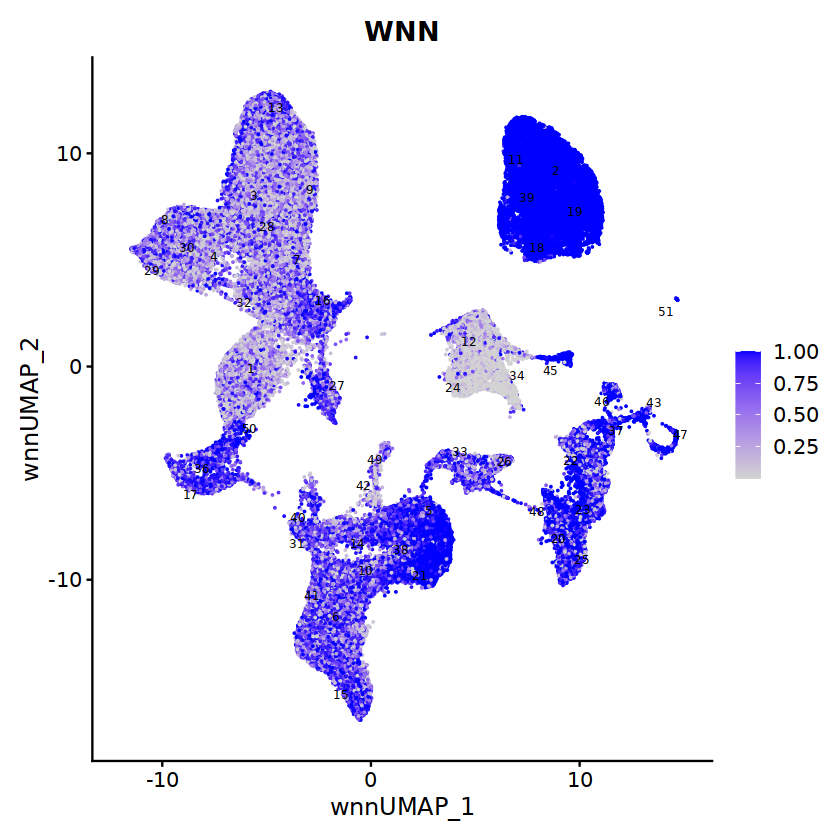

In [33]:
## Graph WNN by CellTypist_conf_score

p3 <- FeaturePlot(adata, reduction = "umap.wnn", 
              features = "CellTypist_conf_score_FBMA", 
              label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")

p3



In [34]:
setwd(path_graphs)
png(file='WNN_by_CellTypist_conf_score_FBMA.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

png 
  2

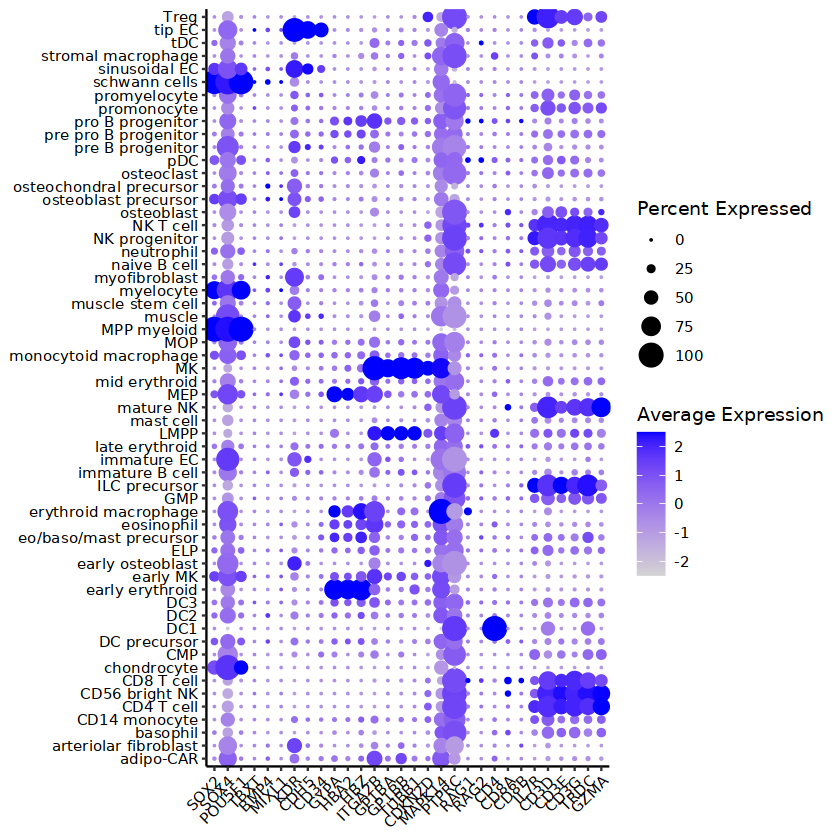

In [35]:
dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="CellTypist_label_FBMA")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_CellTypist_FBMA.png', width =1000)
dotplot3
dev.off()

# Read Immune_ALL_low cell typist prediction

In [36]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/")

In [37]:
cell_typist<-read.csv(file="Immune_ALL_low_celltypist_prediction.csv")

In [38]:
#str(cell_typist)
str(row.names(cell_typist))
row.names(cell_typist)<-cell_typist$X


 chr [1:99255] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [39]:
str(row.names(cell_typist))

 chr [1:99255] "MCO_01326_AAACAGCCACAGCCAT-1" ...


In [40]:
colnames(cell_typist)

[1] "X"                                 "orig.ident"                       
 [3] "nCount_RNA"                        "nFeature_RNA"                     
 [5] "percent.mt"                        "nCount_RNA_raw"                   
 [7] "nFeature_RNA_raw"                  "nCount_ATAC"                      
 [9] "nFeature_ATAC"                     "gex_raw_reads"                    
[11] "gex_mapped_reads"                  "gex_conf_intergenic_reads"        
[13] "gex_conf_exonic_reads"             "gex_conf_intronic_reads"          
[15] "gex_conf_exonic_unique_reads"      "gex_conf_exonic_antisense_reads"  
[17] "gex_conf_exonic_dup_reads"         "gex_exonic_umis"                  
[19] "gex_conf_intronic_unique_reads"    "gex_conf_intronic_antisense_reads"
[21] "gex_conf_intronic_dup_reads"       "gex_intronic_umis"                
[23] "gex_conf_txomic_unique_reads"      "gex_umis_count"                   
[25] "gex_genes_count"                   "atac_raw_reads"                   
[27] "atac_unmapped_reads"               "atac_lowmapq"                     
[29] "atac_dup_reads"                    "atac_chimeric_reads"              
[31] "atac_mitochondrial_reads"          "atac_fragments"                   
[33] "atac_TSS_fragments"                "atac_peak_region_fragments"       
[35] "atac_peak_region_cutsites"         "TSS.enrichment"                   
[37] "TSS.percentile"                    "scDblFinder.class"                
[39] "scDblFinder.score"                 "scDblFinder.weighted"             
[41] "scDblFinder.cxds_score"            "scDblFinder.class_atac"           
[43] "scDblFinder.score_atac"            "scDblFinder.weighted_atac"        
[45] "scDblFinder.cxds_score_atac"       "No_assigned_GFPbc"                
[47] "Assigned_GFPbc"                    "Assigned_GFPgenotype"             
[49] "DBL_comb"                          "amulet_nFrags"                    
[51] "amulet_uniqFrags"                  "amulet_nAbove2"                   
[53] "amulet_total.nAbove2"              "amulet_p.value"                   
[55] "amulet_q.value"                    "doublet_amulet"                   
[57] "nCount_SCT"                        "nFeature_SCT"                     
[59] "SCT.weight"                        "ATAC.weight"                      
[61] "wsnn_res.0.2"                      "seurat_clusters"                  
[63] "Diff"                              "doublet"                          
[65] "wsnn_res.2"                        "n_counts"                         
[67] "predicted_labels"                  "conf_score"

In [41]:
cell_typist_subset<-cell_typist[,c(which(colnames(cell_typist) %in% c("predicted_labels","conf_score")))]

In [42]:
str(cell_typist_subset)
str(row.names(cell_typist_subset))

'data.frame':	99255 obs. of  2 variables:
 $ predicted_labels: chr  "Epithelial cells" "Epithelial cells" "Epithelial cells" "Epithelial cells" ...
 $ conf_score      : num  1 1 1 1 1 ...
 chr [1:99255] "MCO_01326_AAACAGCCACAGCCAT-1" ...


## Add the metadata to the Seurat object

In [43]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$predicted_labels,
  col.name = 'CellTypist_label_Immune_ALL_low'
)

In [44]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$conf_score,
  col.name = 'CellTypist_conf_score_Immune_ALL_low'
)

## WNN by CellTypist_label_Immune_ALL_low

In [45]:
path_graphs<-"/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/graphs/"

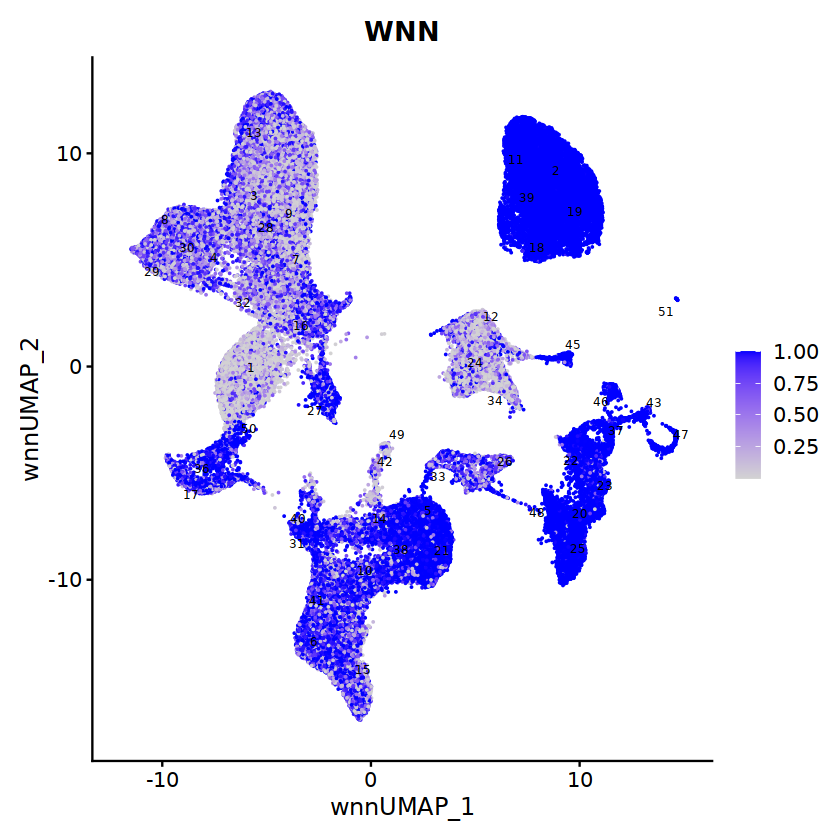

In [46]:
## Graph WNN by CellTypist_conf_score

p3 <- FeaturePlot(adata, reduction = "umap.wnn", 
              features = "CellTypist_conf_score_Immune_ALL_low", 
              label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")

p3



In [47]:
setwd(path_graphs)
png(file='WNN_by_CellTypist_conf_score_Immune_ALL_low.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

png 
  2

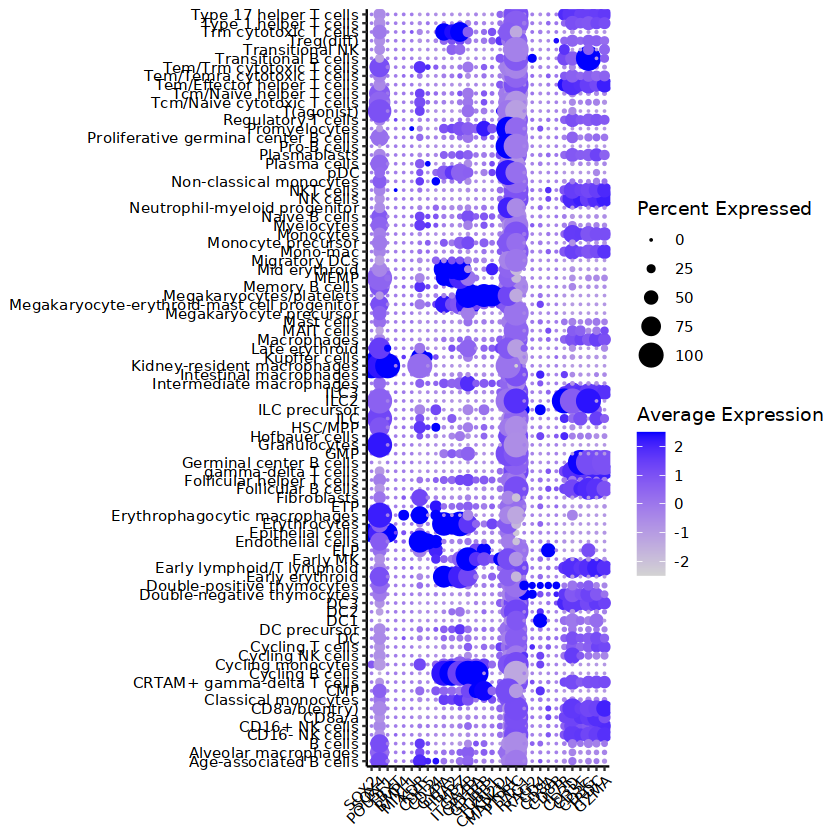

In [48]:
dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="CellTypist_label_Immune_ALL_low")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_CellTypist_Immune_ALL_low.png', width =1000)
dotplot3
dev.off()

# Factor orig.ident

In [49]:
unique(adata@meta.data$orig.ident)

[1] "MCO_01326" "MCO_01327" "MCO_01328" "MCO_01329" "MCO_01330" "MCO_01331"
[7] "MCO_01332" "MCO_01333"

In [50]:
adata@meta.data$orig.ident<-factor(adata@meta.data$orig.ident,
                                                   levels=c('MCO_01326','MCO_01327','MCO_01328','MCO_01329','MCO_01330','MCO_01331','MCO_01332','MCO_01333'),
                                                   ordered=T)

# Analysis Alsinet

In [51]:
adata@meta.data$CellTypist_label_Alsinet<-factor(adata@meta.data$CellTypist_label_Alsinet,
                                                   levels=c('iPSCs',
                                                            'PrimitiveStreak',
                                                            'NeuralCrest',
                                                            'Endoderm',
                                                            'EmergentMesoderm',
                                                            'MesoEcto',
                                                            'AdvancedMesoderm',
                                                            'HemogenicEndothelium',
                                                            'ErythrocyteLineage',
                                                            'Megakaryocytes',
                                                            'EarlyFibroblasts',
                                                            'Fibroblasts',
                                                            'MyeloidProgenitors',
                                                            'Monocytes',
                                                            'Mono-DCprec',
                                                            'Macrophages',
                                                            'MastCells',
                                                            'NeutrophilMyeloidProgenitor'),
                                                   ordered=T)

## Barplot

In [58]:
met<-adata[[]]

In [59]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "percent.mt"                          
 [5] "nCount_RNA_raw"                      
 [6] "nFeature_RNA_raw"                    
 [7] "nCount_ATAC"                         
 [8] "nFeature_ATAC"                       
 [9] "gex_raw_reads"                       
[10] "gex_mapped_reads"                    
[11] "gex_conf_intergenic_reads"           
[12] "gex_conf_exonic_reads"               
[13] "gex_conf_intronic_reads"             
[14] "gex_conf_exonic_unique_reads"        
[15] "gex_conf_exonic_antisense_reads"     
[16] "gex_conf_exonic_dup_reads"           
[17] "gex_exonic_umis"                     
[18] "gex_conf_intronic_unique_reads"      
[19] "gex_conf_intronic_antisense_reads"   
[20] "gex_conf_intronic_dup_reads"         
[21] "gex_intronic_umis"                   
[22] "gex_conf_txomic_unique_reads"        
[23] "gex_umis_count"                      
[24] "gex_genes_count"                     
[25] "atac_raw_reads"                      
[26] "atac_unmapped_reads"                 
[27] "atac_lowmapq"                        
[28] "atac_dup_reads"                      
[29] "atac_chimeric_reads"                 
[30] "atac_mitochondrial_reads"            
[31] "atac_fragments"                      
[32] "atac_TSS_fragments"                  
[33] "atac_peak_region_fragments"          
[34] "atac_peak_region_cutsites"           
[35] "TSS.enrichment"                      
[36] "TSS.percentile"                      
[37] "scDblFinder.class"                   
[38] "scDblFinder.score"                   
[39] "scDblFinder.weighted"                
[40] "scDblFinder.cxds_score"              
[41] "scDblFinder.class_atac"              
[42] "scDblFinder.score_atac"              
[43] "scDblFinder.weighted_atac"           
[44] "scDblFinder.cxds_score_atac"         
[45] "No_assigned_GFPbc"                   
[46] "Assigned_GFPbc"                      
[47] "Assigned_GFPgenotype"                
[48] "DBL_comb"                            
[49] "amulet_nFrags"                       
[50] "amulet_uniqFrags"                    
[51] "amulet_nAbove2"                      
[52] "amulet_total.nAbove2"                
[53] "amulet_p.value"                      
[54] "amulet_q.value"                      
[55] "doublet_amulet"                      
[56] "nCount_SCT"                          
[57] "nFeature_SCT"                        
[58] "SCT.weight"                          
[59] "ATAC.weight"                         
[60] "wsnn_res.0.2"                        
[61] "seurat_clusters"                     
[62] "Diff"                                
[63] "doublet"                             
[64] "wsnn_res.2"                          
[65] "CellTypist_label_Alsinet"            
[66] "CellTypist_conf_score_Alsinet"       
[67] "CellTypist_label_FBMA"               
[68] "CellTypist_conf_score_FBMA"          
[69] "CellTypist_label_Immune_ALL_low"     
[70] "CellTypist_conf_score_Immune_ALL_low"

In [60]:
met.dt<-data.table(met,key=c("seurat_clusters","CellTypist_label_Alsinet",'orig.ident'))

In [61]:
#str(met.dt)

In [62]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [63]:
met.dt<-data.table(met, key=c("seurat_clusters",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [64]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("seurat_clusters",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [65]:
str(Freq.table)

'data.frame':	738 obs. of  6 variables:
 $ seurat_clusters         : Factor w/ 51 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident              : Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 6 6 6 6 6 6 6 6 6 6 ...
 $ CellTypist_label_Alsinet: Ord.factor w/ 18 levels "iPSCs"<"PrimitiveStreak"<..: 2 3 6 7 8 10 11 15 12 13 ...
 $ Freq                    : int  453 1 4 81 2 145 483 36 7 13 ...
 $ TOTAL                   : int  6763 6763 6763 6763 6763 6763 6763 6763 6763 6763 ...
 $ Perc                    : num  6.7 0.01 0.06 1.2 0.03 2.14 7.14 0.53 0.1 0.19 ...


In [66]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1      53     442    1216    1943    6763 

In [67]:
met.dt<-data.table(met, key=c("CellTypist_label_Alsinet"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_CellTypist_label_Alsinet=.N),by=key(met.dt)], stringsAsFactors=F)



In [68]:
str(Freq.table_CT_annotation)

'data.frame':	18 obs. of  2 variables:
 $ CellTypist_label_Alsinet     : Ord.factor w/ 18 levels "iPSCs"<"PrimitiveStreak"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_CellTypist_label_Alsinet: int  7001 6265 416 643 299 546 1626 11742 461 26664 ...


### Filter x axis by frequency

In [69]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 100),]


str(Freq.table_filtered)

'data.frame':	533 obs. of  6 variables:
 $ seurat_clusters         : Factor w/ 51 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident              : Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 6 6 6 6 6 6 6 6 6 6 ...
 $ CellTypist_label_Alsinet: Ord.factor w/ 18 levels "iPSCs"<"PrimitiveStreak"<..: 2 3 6 7 8 10 11 15 12 13 ...
 $ Freq                    : int  453 1 4 81 2 145 483 36 7 13 ...
 $ TOTAL                   : int  6763 6763 6763 6763 6763 6763 6763 6763 6763 6763 ...
 $ Perc                    : num  6.7 0.01 0.06 1.2 0.03 2.14 7.14 0.53 0.1 0.19 ...


In [70]:
vector_colors_CellTypist_label_Alsinet<-c(brewer.pal(9, "Set1"),brewer.pal(12, "Set3"),"white")


length(vector_colors_CellTypist_label_Alsinet)

[1] 22

-------------------------------------->	0 25 50 75 100


Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."
Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."


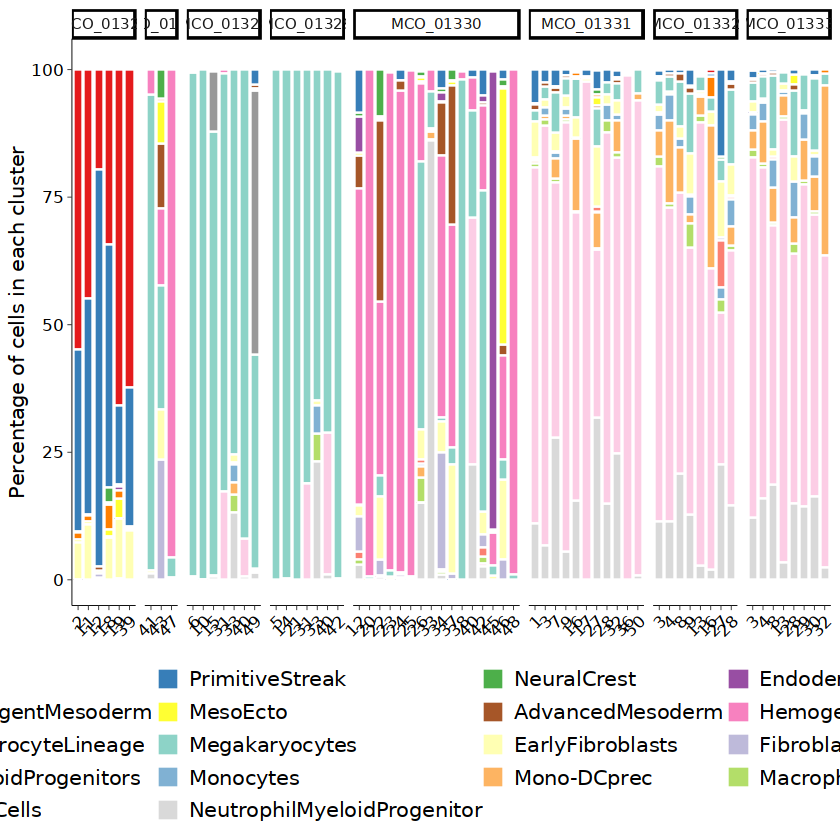

In [71]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-ggplot(data= Freq.table_filtered,
           aes(x=seurat_clusters, y=Perc, fill=CellTypist_label_Alsinet)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=vector_colors_CellTypist_label_Alsinet,
                      drop=F,
                      name="Alsinet model")

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident, scales='free_x', space='free_x', switch="y")+   
    scale_x_discrete(name="Seurat clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=5,byrow=TRUE))



stacked_barplot
  




  

In [72]:
setwd(path_graphs)

svgname<-paste("Stacked_barplot_Alsinet_vs_cluster",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =13, height = 13)
}

## WNN by CellTypist_label_Alsinet

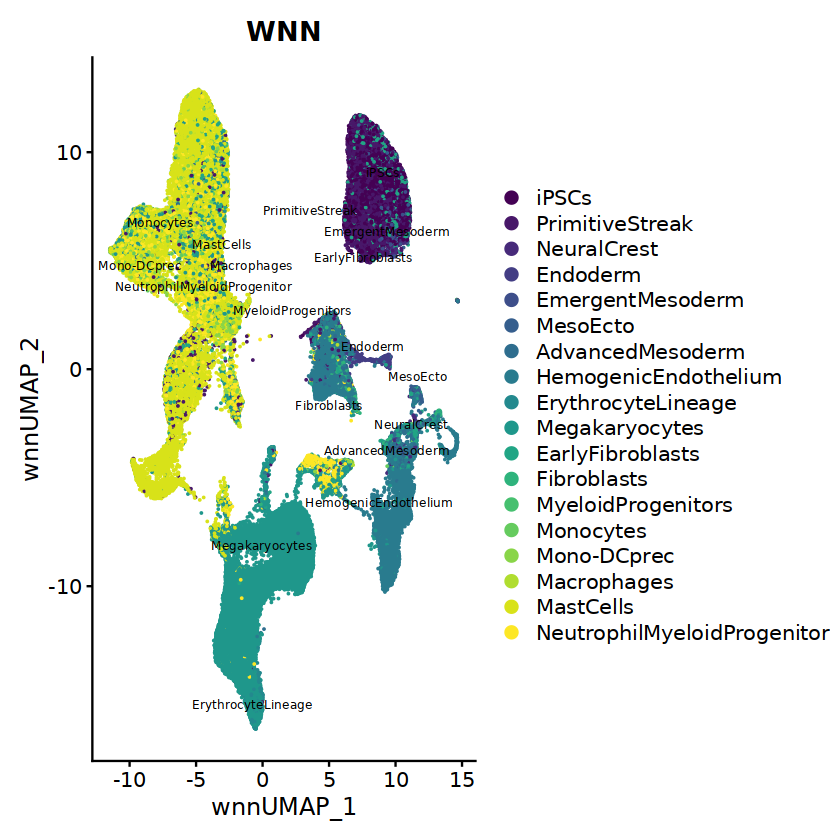

In [73]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "CellTypist_label_Alsinet", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3

In [74]:
path_graphs<-"/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/graphs/"

In [75]:
## Graph WNN by CellTypist_label_filtered

setwd(path_graphs)
png(file='WNN_by_CellTypist_label_Alsinet.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

# First iteration of integrated annotation

In [77]:
adata@meta.data$Integrated_annotation<-NA

## Decision #1 hESCs<-'iPSCs','PrimitiveStreak','NeuralCrest','Endoderm','EmergentMesoderm','MesoEcto'

In [78]:
indx.hESCs<-which(adata@meta.data$CellTypist_label_Alsinet%in%c('iPSCs','PrimitiveStreak','NeuralCrest','Endoderm','EmergentMesoderm','MesoEcto'))

str(indx.hESCs)

 int [1:15170] 1 3 4 5 6 7 8 9 10 11 ...


In [79]:
adata@meta.data$Integrated_annotation[indx.hESCs]<-'hESC'

## Decision #2 HemogenicEndothelium c('AdvancedMesoderm','HemogenicEndothelium')

In [80]:
indx.HemogenicEndothelium<-which(adata@meta.data$CellTypist_label_Alsinet%in%c('AdvancedMesoderm','HemogenicEndothelium'))

str(indx.HemogenicEndothelium)

 int [1:13368] 2688 8932 9519 12604 12686 13210 13314 13730 13733 13734 ...


In [81]:
adata@meta.data$Integrated_annotation[indx.HemogenicEndothelium]<-'HemogenicEndothelium'

# Analysis FBMA

In [82]:
colnames(adata@meta.data)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "percent.mt"                          
 [5] "nCount_RNA_raw"                      
 [6] "nFeature_RNA_raw"                    
 [7] "nCount_ATAC"                         
 [8] "nFeature_ATAC"                       
 [9] "gex_raw_reads"                       
[10] "gex_mapped_reads"                    
[11] "gex_conf_intergenic_reads"           
[12] "gex_conf_exonic_reads"               
[13] "gex_conf_intronic_reads"             
[14] "gex_conf_exonic_unique_reads"        
[15] "gex_conf_exonic_antisense_reads"     
[16] "gex_conf_exonic_dup_reads"           
[17] "gex_exonic_umis"                     
[18] "gex_conf_intronic_unique_reads"      
[19] "gex_conf_intronic_antisense_reads"   
[20] "gex_conf_intronic_dup_reads"         
[21] "gex_intronic_umis"                   
[22] "gex_conf_txomic_unique_reads"        
[23] "gex_umis_count"                      
[24] "gex_genes_count"                     
[25] "atac_raw_reads"                      
[26] "atac_unmapped_reads"                 
[27] "atac_lowmapq"                        
[28] "atac_dup_reads"                      
[29] "atac_chimeric_reads"                 
[30] "atac_mitochondrial_reads"            
[31] "atac_fragments"                      
[32] "atac_TSS_fragments"                  
[33] "atac_peak_region_fragments"          
[34] "atac_peak_region_cutsites"           
[35] "TSS.enrichment"                      
[36] "TSS.percentile"                      
[37] "scDblFinder.class"                   
[38] "scDblFinder.score"                   
[39] "scDblFinder.weighted"                
[40] "scDblFinder.cxds_score"              
[41] "scDblFinder.class_atac"              
[42] "scDblFinder.score_atac"              
[43] "scDblFinder.weighted_atac"           
[44] "scDblFinder.cxds_score_atac"         
[45] "No_assigned_GFPbc"                   
[46] "Assigned_GFPbc"                      
[47] "Assigned_GFPgenotype"                
[48] "DBL_comb"                            
[49] "amulet_nFrags"                       
[50] "amulet_uniqFrags"                    
[51] "amulet_nAbove2"                      
[52] "amulet_total.nAbove2"                
[53] "amulet_p.value"                      
[54] "amulet_q.value"                      
[55] "doublet_amulet"                      
[56] "nCount_SCT"                          
[57] "nFeature_SCT"                        
[58] "SCT.weight"                          
[59] "ATAC.weight"                         
[60] "wsnn_res.0.2"                        
[61] "seurat_clusters"                     
[62] "Diff"                                
[63] "doublet"                             
[64] "wsnn_res.2"                          
[65] "CellTypist_label_Alsinet"            
[66] "CellTypist_conf_score_Alsinet"       
[67] "CellTypist_label_FBMA"               
[68] "CellTypist_conf_score_FBMA"          
[69] "CellTypist_label_Immune_ALL_low"     
[70] "CellTypist_conf_score_Immune_ALL_low"
[71] "Integrated_annotation"

In [83]:
indx.new<-is.na(adata@meta.data$Integrated_annotation)

str(indx.new)

 logi [1:99255] FALSE TRUE FALSE FALSE FALSE FALSE ...


In [84]:
adata@meta.data$Integrated_annotation[indx.new]<-adata@meta.data$CellTypist_label_FBMA[indx.new]

In [85]:
adata@meta.data$Integrated_annotation<-factor(adata@meta.data$Integrated_annotation)


summary(adata@meta.data$Integrated_annotation)


levels(adata@meta.data$Integrated_annotation)


length(levels(adata@meta.data$Integrated_annotation))

adipo-CAR   arteriolar fibroblast                basophil 
                     20                      17                      21 
          CD14 monocyte              CD4 T cell          CD56 bright NK 
                    697                    8516                    8811 
             CD8 T cell                     CMP            DC precursor 
                     83                       7                      84 
                    DC1                     DC2                     DC3 
                      1                     169                    7857 
        early erythroid                early MK        early osteoblast 
                   2001                    1419                       6 
                    ELP  eo/baso/mast precursor              eosinophil 
                    712                      51                     926 
   erythroid macrophage                     GMP    HemogenicEndothelium 
                      5                    5195                   13368 
                   hESC           ILC precursor         immature B cell 
                  15170                     102                      51 
         late erythroid                    LMPP               mast cell 
                   5528                       4                    1241 
              mature NK                     MEP           mid erythroid 
                    644                    2039                     420 
                     MK   monocytoid macrophage                     MOP 
                   9078                     517                     292 
            MPP myeloid                  muscle        muscle stem cell 
                      1                      30                       7 
              myelocyte           myofibroblast            naive B cell 
                   1714                       9                     810 
             neutrophil           NK progenitor               NK T cell 
                    935                     806                    1454 
             osteoblast    osteoblast precursor osteochondral precursor 
                      5                     211                     151 
             osteoclast                     pDC        pre B progenitor 
                    417                      38                     275 
   pre pro B progenitor        pro B progenitor             promonocyte 
                   4189                     376                    1795 
           promyelocyte           schwann cells           sinusoidal EC 
                    340                     189                     162 
     stromal macrophage                     tDC                  tip EC 
                     23                      14                     199 
                   Treg 
                     53

[1] "adipo-CAR"               "arteriolar fibroblast"  
 [3] "basophil"                "CD14 monocyte"          
 [5] "CD4 T cell"              "CD56 bright NK"         
 [7] "CD8 T cell"              "CMP"                    
 [9] "DC precursor"            "DC1"                    
[11] "DC2"                     "DC3"                    
[13] "early erythroid"         "early MK"               
[15] "early osteoblast"        "ELP"                    
[17] "eo/baso/mast precursor"  "eosinophil"             
[19] "erythroid macrophage"    "GMP"                    
[21] "HemogenicEndothelium"    "hESC"                   
[23] "ILC precursor"           "immature B cell"        
[25] "late erythroid"          "LMPP"                   
[27] "mast cell"               "mature NK"              
[29] "MEP"                     "mid erythroid"          
[31] "MK"                      "monocytoid macrophage"  
[33] "MOP"                     "MPP myeloid"            
[35] "muscle"                  "muscle stem cell"       
[37] "myelocyte"               "myofibroblast"          
[39] "naive B cell"            "neutrophil"             
[41] "NK progenitor"           "NK T cell"              
[43] "osteoblast"              "osteoblast precursor"   
[45] "osteochondral precursor" "osteoclast"             
[47] "pDC"                     "pre B progenitor"       
[49] "pre pro B progenitor"    "pro B progenitor"       
[51] "promonocyte"             "promyelocyte"           
[53] "schwann cells"           "sinusoidal EC"          
[55] "stromal macrophage"      "tDC"                    
[57] "tip EC"                  "Treg"

[1] 58

In [86]:
adata@meta.data$Integrated_annotation<-as.character(adata@meta.data$Integrated_annotation)

## Decision #3 hESCs<-'promyelocyte','schwann cells'

In [87]:
indx.hESCs<-which(adata@meta.data$Integrated_annotation%in%c('promyelocyte','schwann cells'))

str(indx.hESCs)

 int [1:529] 200 226 363 442 444 468 514 623 710 722 ...


In [88]:
adata@meta.data$Integrated_annotation[indx.hESCs]<-'hESC'

## Decision #4 HemogenicEndothelium c('tip EC','sinusoidal EC')

In [89]:
indx.HemogenicEndothelium<-which(adata@meta.data$Integrated_annotation%in%c('tip EC','sinusoidal EC'))

str(indx.HemogenicEndothelium)

 int [1:361] 192 224 420 792 947 1061 1388 1441 1574 1711 ...


In [90]:
adata@meta.data$Integrated_annotation[indx.HemogenicEndothelium]<-'HemogenicEndothelium'

## Decision #5 MEP c('DC3')

In [91]:
indx.MEP<-which(adata@meta.data$Integrated_annotation%in%c('DC3'))

str(indx.MEP)

 int [1:7857] 2 99 304 351 360 392 720 849 952 1180 ...


In [92]:
adata@meta.data$Integrated_annotation[indx.MEP]<-'MEP'

In [93]:
adata@meta.data$Integrated_annotation<-factor(adata@meta.data$Integrated_annotation)


summary(adata@meta.data$Integrated_annotation)


levels(adata@meta.data$Integrated_annotation)


length(levels(adata@meta.data$Integrated_annotation))

adipo-CAR   arteriolar fibroblast                basophil 
                     20                      17                      21 
          CD14 monocyte              CD4 T cell          CD56 bright NK 
                    697                    8516                    8811 
             CD8 T cell                     CMP            DC precursor 
                     83                       7                      84 
                    DC1                     DC2         early erythroid 
                      1                     169                    2001 
               early MK        early osteoblast                     ELP 
                   1419                       6                     712 
 eo/baso/mast precursor              eosinophil    erythroid macrophage 
                     51                     926                       5 
                    GMP    HemogenicEndothelium                    hESC 
                   5195                   13729                   15699 
          ILC precursor         immature B cell          late erythroid 
                    102                      51                    5528 
                   LMPP               mast cell               mature NK 
                      4                    1241                     644 
                    MEP           mid erythroid                      MK 
                   9896                     420                    9078 
  monocytoid macrophage                     MOP             MPP myeloid 
                    517                     292                       1 
                 muscle        muscle stem cell               myelocyte 
                     30                       7                    1714 
          myofibroblast            naive B cell              neutrophil 
                      9                     810                     935 
          NK progenitor               NK T cell              osteoblast 
                    806                    1454                       5 
   osteoblast precursor osteochondral precursor              osteoclast 
                    211                     151                     417 
                    pDC        pre B progenitor    pre pro B progenitor 
                     38                     275                    4189 
       pro B progenitor             promonocyte      stromal macrophage 
                    376                    1795                      23 
                    tDC                    Treg 
                     14                      53

[1] "adipo-CAR"               "arteriolar fibroblast"  
 [3] "basophil"                "CD14 monocyte"          
 [5] "CD4 T cell"              "CD56 bright NK"         
 [7] "CD8 T cell"              "CMP"                    
 [9] "DC precursor"            "DC1"                    
[11] "DC2"                     "early erythroid"        
[13] "early MK"                "early osteoblast"       
[15] "ELP"                     "eo/baso/mast precursor" 
[17] "eosinophil"              "erythroid macrophage"   
[19] "GMP"                     "HemogenicEndothelium"   
[21] "hESC"                    "ILC precursor"          
[23] "immature B cell"         "late erythroid"         
[25] "LMPP"                    "mast cell"              
[27] "mature NK"               "MEP"                    
[29] "mid erythroid"           "MK"                     
[31] "monocytoid macrophage"   "MOP"                    
[33] "MPP myeloid"             "muscle"                 
[35] "muscle stem cell"        "myelocyte"              
[37] "myofibroblast"           "naive B cell"           
[39] "neutrophil"              "NK progenitor"          
[41] "NK T cell"               "osteoblast"             
[43] "osteoblast precursor"    "osteochondral precursor"
[45] "osteoclast"              "pDC"                    
[47] "pre B progenitor"        "pre pro B progenitor"   
[49] "pro B progenitor"        "promonocyte"            
[51] "stromal macrophage"      "tDC"                    
[53] "Treg"

[1] 53

In [94]:
vector_colors<-rep(NA, length(levels(adata@meta.data$Integrated_annotation)))

str(vector_colors)

 logi [1:53] NA NA NA NA NA NA ...


In [95]:
vector_colors[c(1:14)]<-c(brewer.pal(9, "Set1")[c(1:2)],
                          brewer.pal(12, "Set3")[c(1:5)],
                          brewer.pal(9, "Set1")[c(3:9)])

str(vector_colors)

 chr [1:53] "#E41A1C" "#377EB8" "#8DD3C7" "#FFFFB3" "#BEBADA" "#FB8072" ...


In [96]:
names(vector_colors)[c(1:14)]<-c('hESC','HemogenicEndothelium','LMPP','MPP myeloid','CMP','GMP','ELP','MEP','early erythroid','mid erythroid','late erythroid','erythroid macrophage','early MK','MK')

In [97]:
vector_colors[c(1:14)]

hESC HemogenicEndothelium                 LMPP 
           "#E41A1C"            "#377EB8"            "#8DD3C7" 
         MPP myeloid                  CMP                  GMP 
           "#FFFFB3"            "#BEBADA"            "#FB8072" 
                 ELP                  MEP      early erythroid 
           "#80B1D3"            "#4DAF4A"            "#984EA3" 
       mid erythroid       late erythroid erythroid macrophage 
           "#FF7F00"            "#FFFF33"            "#A65628" 
            early MK                   MK 
           "#F781BF"            "#999999"

In [98]:
monolineage<-c('MOP','promonocyte','CD14 monocyte','monocytoid macrophage','stromal macrophage','DC precursor','DC1','DC2','pDC','tDC','neutrophil','basophil','eo/baso/mast precursor','eosinophil','mast cell')

str(monolineage)

 chr [1:15] "MOP" "promonocyte" "CD14 monocyte" "monocytoid macrophage" ...


In [99]:
names(vector_colors)[c(15:29)]<-monolineage

In [100]:
vector_colors[c(15:23)]<-brewer.pal(9, "Greens")

vector_colors[c(24:29)]<-brewer.pal(6, "Blues")

In [101]:
vector_colors[c(1:29)]

hESC   HemogenicEndothelium                   LMPP 
             "#E41A1C"              "#377EB8"              "#8DD3C7" 
           MPP myeloid                    CMP                    GMP 
             "#FFFFB3"              "#BEBADA"              "#FB8072" 
                   ELP                    MEP        early erythroid 
             "#80B1D3"              "#4DAF4A"              "#984EA3" 
         mid erythroid         late erythroid   erythroid macrophage 
             "#FF7F00"              "#FFFF33"              "#A65628" 
              early MK                     MK                    MOP 
             "#F781BF"              "#999999"              "#F7FCF5" 
           promonocyte          CD14 monocyte  monocytoid macrophage 
             "#E5F5E0"              "#C7E9C0"              "#A1D99B" 
    stromal macrophage           DC precursor                    DC1 
             "#74C476"              "#41AB5D"              "#238B45" 
                   DC2                    pDC                    tDC 
             "#006D2C"              "#00441B"              "#EFF3FF" 
            neutrophil               basophil eo/baso/mast precursor 
             "#C6DBEF"              "#9ECAE1"              "#6BAED6" 
            eosinophil              mast cell 
             "#3182BD"              "#08519C"

In [102]:
lymphoid_lineage<-c('immature B cell','pre B progenitor','pre pro B progenitor','pro B progenitor','naive B cell','CD4 T cell','CD8 T cell','ILC precursor','Treg')

str(lymphoid_lineage)

 chr [1:9] "immature B cell" "pre B progenitor" "pre pro B progenitor" ...


In [103]:
lymphoid_lineage

[1] "immature B cell"      "pre B progenitor"     "pre pro B progenitor"
[4] "pro B progenitor"     "naive B cell"         "CD4 T cell"          
[7] "CD8 T cell"           "ILC precursor"        "Treg"

In [104]:
names(vector_colors)[c(30:38)]<-lymphoid_lineage

In [105]:
vector_colors[c(30:38)]<-brewer.pal(9, "Reds")


In [106]:
NK.lineage<-c('NK progenitor','NK T cell','CD56 bright NK','mature NK')

str(NK.lineage)

 chr [1:4] "NK progenitor" "NK T cell" "CD56 bright NK" "mature NK"


In [107]:
names(vector_colors)[c(39:42)]<-NK.lineage

In [108]:
vector_colors[c(39:42)]<-brewer.pal(9, "Oranges")[c(4:7)]

In [109]:
vector_colors[c(1:42)]

hESC   HemogenicEndothelium                   LMPP 
             "#E41A1C"              "#377EB8"              "#8DD3C7" 
           MPP myeloid                    CMP                    GMP 
             "#FFFFB3"              "#BEBADA"              "#FB8072" 
                   ELP                    MEP        early erythroid 
             "#80B1D3"              "#4DAF4A"              "#984EA3" 
         mid erythroid         late erythroid   erythroid macrophage 
             "#FF7F00"              "#FFFF33"              "#A65628" 
              early MK                     MK                    MOP 
             "#F781BF"              "#999999"              "#F7FCF5" 
           promonocyte          CD14 monocyte  monocytoid macrophage 
             "#E5F5E0"              "#C7E9C0"              "#A1D99B" 
    stromal macrophage           DC precursor                    DC1 
             "#74C476"              "#41AB5D"              "#238B45" 
                   DC2                    pDC                    tDC 
             "#006D2C"              "#00441B"              "#EFF3FF" 
            neutrophil               basophil eo/baso/mast precursor 
             "#C6DBEF"              "#9ECAE1"              "#6BAED6" 
            eosinophil              mast cell        immature B cell 
             "#3182BD"              "#08519C"              "#FFF5F0" 
      pre B progenitor   pre pro B progenitor       pro B progenitor 
             "#FEE0D2"              "#FCBBA1"              "#FC9272" 
          naive B cell             CD4 T cell             CD8 T cell 
             "#FB6A4A"              "#EF3B2C"              "#CB181D" 
         ILC precursor                   Treg          NK progenitor 
             "#A50F15"              "#67000D"              "#FDAE6B" 
             NK T cell         CD56 bright NK              mature NK 
             "#FD8D3C"              "#F16913"              "#D94801"

In [110]:
rest<-c('myelocyte','osteoblast','osteoblast precursor','osteochondral precursor','osteoclast','adipo-CAR','arteriolar fibroblast','early osteoblast','myofibroblast','muscle','muscle stem cell')

In [111]:
names(vector_colors)[c(43:53)]<-rest

In [112]:
vector_colors[c(43:53)]<-c(brewer.pal(9, "Greys"),brewer.pal(9, "Greys")[c(5:6)])

In [113]:
adata@meta.data$Integrated_annotation<-factor(adata@meta.data$Integrated_annotation,
                                                   levels=names(vector_colors),
                                                   ordered=T)

## Barplot

In [114]:
met<-adata[[]]

In [115]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "percent.mt"                          
 [5] "nCount_RNA_raw"                      
 [6] "nFeature_RNA_raw"                    
 [7] "nCount_ATAC"                         
 [8] "nFeature_ATAC"                       
 [9] "gex_raw_reads"                       
[10] "gex_mapped_reads"                    
[11] "gex_conf_intergenic_reads"           
[12] "gex_conf_exonic_reads"               
[13] "gex_conf_intronic_reads"             
[14] "gex_conf_exonic_unique_reads"        
[15] "gex_conf_exonic_antisense_reads"     
[16] "gex_conf_exonic_dup_reads"           
[17] "gex_exonic_umis"                     
[18] "gex_conf_intronic_unique_reads"      
[19] "gex_conf_intronic_antisense_reads"   
[20] "gex_conf_intronic_dup_reads"         
[21] "gex_intronic_umis"                   
[22] "gex_conf_txomic_unique_reads"        
[23] "gex_umis_count"                      
[24] "gex_genes_count"                     
[25] "atac_raw_reads"                      
[26] "atac_unmapped_reads"                 
[27] "atac_lowmapq"                        
[28] "atac_dup_reads"                      
[29] "atac_chimeric_reads"                 
[30] "atac_mitochondrial_reads"            
[31] "atac_fragments"                      
[32] "atac_TSS_fragments"                  
[33] "atac_peak_region_fragments"          
[34] "atac_peak_region_cutsites"           
[35] "TSS.enrichment"                      
[36] "TSS.percentile"                      
[37] "scDblFinder.class"                   
[38] "scDblFinder.score"                   
[39] "scDblFinder.weighted"                
[40] "scDblFinder.cxds_score"              
[41] "scDblFinder.class_atac"              
[42] "scDblFinder.score_atac"              
[43] "scDblFinder.weighted_atac"           
[44] "scDblFinder.cxds_score_atac"         
[45] "No_assigned_GFPbc"                   
[46] "Assigned_GFPbc"                      
[47] "Assigned_GFPgenotype"                
[48] "DBL_comb"                            
[49] "amulet_nFrags"                       
[50] "amulet_uniqFrags"                    
[51] "amulet_nAbove2"                      
[52] "amulet_total.nAbove2"                
[53] "amulet_p.value"                      
[54] "amulet_q.value"                      
[55] "doublet_amulet"                      
[56] "nCount_SCT"                          
[57] "nFeature_SCT"                        
[58] "SCT.weight"                          
[59] "ATAC.weight"                         
[60] "wsnn_res.0.2"                        
[61] "seurat_clusters"                     
[62] "Diff"                                
[63] "doublet"                             
[64] "wsnn_res.2"                          
[65] "CellTypist_label_Alsinet"            
[66] "CellTypist_conf_score_Alsinet"       
[67] "CellTypist_label_FBMA"               
[68] "CellTypist_conf_score_FBMA"          
[69] "CellTypist_label_Immune_ALL_low"     
[70] "CellTypist_conf_score_Immune_ALL_low"
[71] "Integrated_annotation"

In [116]:
met.dt<-data.table(met,key=c("seurat_clusters","Integrated_annotation",'orig.ident'))

In [117]:
#str(met.dt)

In [118]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [119]:
met.dt<-data.table(met, key=c("seurat_clusters",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [120]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("seurat_clusters",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [121]:
str(Freq.table)

'data.frame':	1892 obs. of  6 variables:
 $ seurat_clusters      : Factor w/ 51 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident           : Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 6 6 6 6 6 6 6 6 6 6 ...
 $ Integrated_annotation: Ord.factor w/ 53 levels "hESC"<"HemogenicEndothelium"<..: 1 2 5 6 7 8 9 10 11 27 ...
 $ Freq                 : int  517 84 3 964 90 1160 60 39 919 4 ...
 $ TOTAL                : int  6763 6763 6763 6763 6763 6763 6763 6763 6763 6763 ...
 $ Perc                 : num  7.64 1.24 0.04 14.25 1.33 ...


In [122]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   125.8   763.5  1366.8  2242.0  6763.0 

In [123]:
met.dt<-data.table(met, key=c("Integrated_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_Integrated_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [124]:
str(Freq.table_CT_annotation)

'data.frame':	53 obs. of  2 variables:
 $ Integrated_annotation     : Ord.factor w/ 53 levels "hESC"<"HemogenicEndothelium"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Integrated_annotation: int  15699 13729 4 1 7 5195 712 9896 2001 420 ...


### Filter x axis by frequency

In [125]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 100),]


str(Freq.table_filtered)

'data.frame':	1475 obs. of  6 variables:
 $ seurat_clusters      : Factor w/ 51 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident           : Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 6 6 6 6 6 6 6 6 6 6 ...
 $ Integrated_annotation: Ord.factor w/ 53 levels "hESC"<"HemogenicEndothelium"<..: 1 2 5 6 7 8 9 10 11 27 ...
 $ Freq                 : int  517 84 3 964 90 1160 60 39 919 4 ...
 $ TOTAL                : int  6763 6763 6763 6763 6763 6763 6763 6763 6763 6763 ...
 $ Perc                 : num  7.64 1.24 0.04 14.25 1.33 ...


-------------------------------------->	0 25 50 75 100


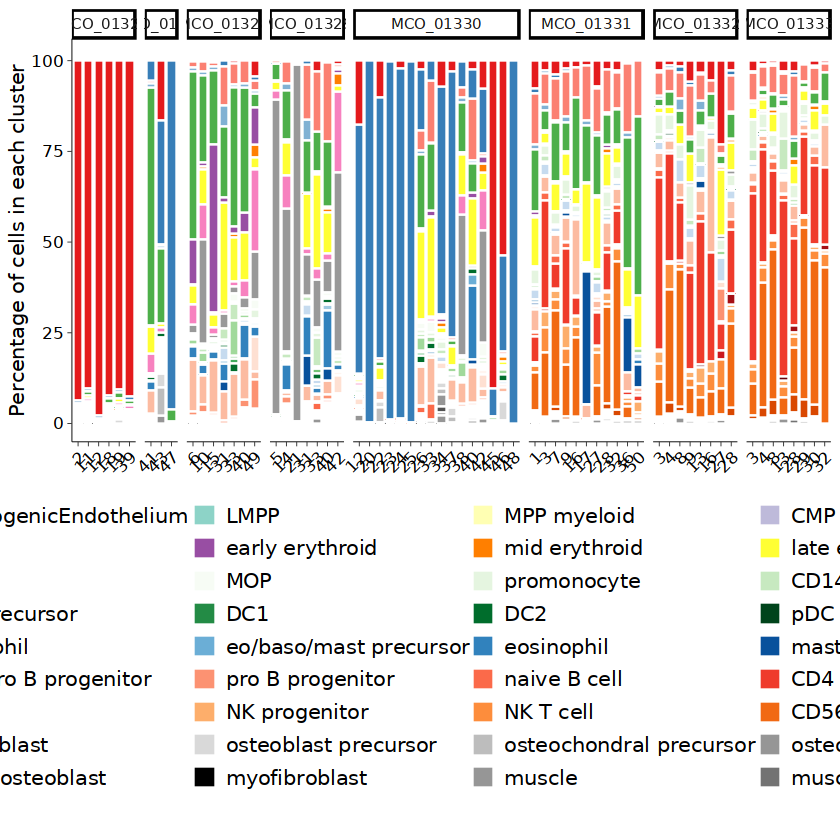

In [126]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-ggplot(data= Freq.table_filtered,
           aes(x=seurat_clusters, y=Perc, fill=Integrated_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=vector_colors,
                      drop=F,
                      name="Integrated Annot")

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident, scales='free_x', space='free_x', switch="y")+   
    scale_x_discrete(name="Seurat clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=10,byrow=TRUE))



stacked_barplot
  




  

In [127]:
setwd(path_graphs)

svgname<-paste("Stacked_barplot_FBMA_vs_cluster",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =13, height = 13)
}

## Dotplot

png 
  2

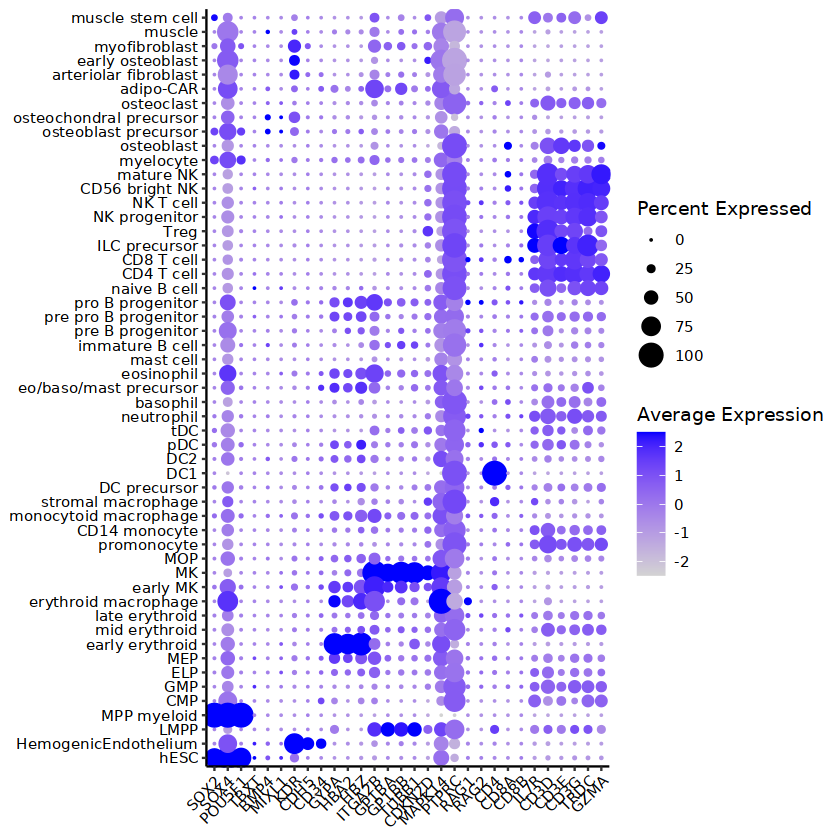

In [128]:
dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="Integrated_annotation")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_Integrated_annotation_one.png', width =1000)
dotplot3
dev.off()

# New round of decisions

In [129]:
adata@meta.data$Integrated_annotation<-as.character(adata@meta.data$Integrated_annotation)

## Decision #6 hESCs<- clusters('2','11','12','18','19','39')

In [130]:
indx.hESCs<-which(adata@meta.data$seurat_clusters%in%c('2','11','12','18','19','39'))

str(indx.hESCs)

 int [1:16268] 1 2 3 4 5 6 7 8 9 10 ...


In [131]:
adata@meta.data$Integrated_annotation[indx.hESCs]<-'hESC'

## Decision #7 From FBMA keep: c('MEP','early erythroid','mid erythroid','late erythroid','erythroid macrophage','early MK','MK')

In [132]:
indx.keep<-which(adata@meta.data$Integrated_annotation%in%c('hESC','HemogenicEndothelium','MEP','early erythroid','mid erythroid','late erythroid','erythroid macrophage','early MK','MK'))

str(indx.keep)

 int [1:58701] 1 2 3 4 5 6 7 8 9 10 ...


In [133]:
adata@meta.data$Integrated_annotation[-indx.keep]<-NA

# Analysis ImmuneALL

In [134]:
adata@meta.data$Integrated_annotation[is.na(adata@meta.data$Integrated_annotation)]<-adata@meta.data$CellTypist_label_Immune_ALL_low[is.na(adata@meta.data$Integrated_annotation)]

In [135]:
adata@meta.data$Integrated_annotation<-factor(adata@meta.data$Integrated_annotation)


summary(adata@meta.data$Integrated_annotation)


levels(adata@meta.data$Integrated_annotation)


length(levels(adata@meta.data$Integrated_annotation))

Age-associated B cells 
                                           7 
                        Alveolar macrophages 
                                         251 
                                     B cells 
                                           6 
                              CD16- NK cells 
                                        7298 
                              CD16+ NK cells 
                                         237 
                                      CD8a/a 
                                          88 
                               CD8a/b(entry) 
                                          60 
                         Classical monocytes 
                                         624 
                  CRTAM+ gamma-delta T cells 
                                          48 
                             Cycling B cells 
                                           1 
                           Cycling monocytes 
                                           1 
                            Cycling NK cells 
                                           4 
                             Cycling T cells 
                                          15 
                                          DC 
                                          69 
                                DC precursor 
                                          27 
                                         DC1 
                                           2 
                                         DC2 
                                          25 
                                         DC3 
                                          23 
                  Double-negative thymocytes 
                                        1332 
                  Double-positive thymocytes 
                                         162 
                             early erythroid 
                                        1988 
                             Early erythroid 
                                         401 
                   Early lymphoid/T lymphoid 
                                         458 
                                    early MK 
                                        1324 
                                    Early MK 
                                          13 
                           Endothelial cells 
                                         332 
                            Epithelial cells 
                                         774 
                                Erythrocytes 
                                         897 
                        erythroid macrophage 
                                           5 
                                         ETP 
                                          24 
                                 Fibroblasts 
                                         303 
                          Follicular B cells 
                                          24 
                   Follicular helper T cells 
                                          92 
                         gamma-delta T cells 
                                        1258 
                     Germinal center B cells 
                                           1 
                                         GMP 
                                           2 
                                Granulocytes 
                                           1 
                        HemogenicEndothelium 
                                       11887 
                                        hESC 
                                       18863 
                              Hofbauer cells 
                                           5 
                                     HSC/MPP 
                                          29 
                                         ILC 
                                           1 
                               ILC precursor 
                                           1 
                                        ILC3 
                    

[1] "Age-associated B cells"                      
 [2] "Alveolar macrophages"                        
 [3] "B cells"                                     
 [4] "CD16- NK cells"                              
 [5] "CD16+ NK cells"                              
 [6] "CD8a/a"                                      
 [7] "CD8a/b(entry)"                               
 [8] "Classical monocytes"                         
 [9] "CRTAM+ gamma-delta T cells"                  
[10] "Cycling B cells"                             
[11] "Cycling monocytes"                           
[12] "Cycling NK cells"                            
[13] "Cycling T cells"                             
[14] "DC"                                          
[15] "DC precursor"                                
[16] "DC1"                                         
[17] "DC2"                                         
[18] "DC3"                                         
[19] "Double-negative thymocytes"                  
[20] "Double-positive thymocytes"                  
[21] "early erythroid"                             
[22] "Early erythroid"                             
[23] "Early lymphoid/T lymphoid"                   
[24] "early MK"                                    
[25] "Early MK"                                    
[26] "Endothelial cells"                           
[27] "Epithelial cells"                            
[28] "Erythrocytes"                                
[29] "erythroid macrophage"                        
[30] "ETP"                                         
[31] "Fibroblasts"                                 
[32] "Follicular B cells"                          
[33] "Follicular helper T cells"                   
[34] "gamma-delta T cells"                         
[35] "Germinal center B cells"                     
[36] "GMP"                                         
[37] "Granulocytes"                                
[38] "HemogenicEndothelium"                        
[39] "hESC"                                        
[40] "Hofbauer cells"                              
[41] "HSC/MPP"                                     
[42] "ILC"                                         
[43] "ILC precursor"                               
[44] "ILC3"                                        
[45] "Intermediate macrophages"                    
[46] "Intestinal macrophages"                      
[47] "Kupffer cells"                               
[48] "late erythroid"                              
[49] "Late erythroid"                              
[50] "Macrophages"                                 
[51] "MAIT cells"                                  
[52] "Mast cells"                                  
[53] "Megakaryocyte-erythroid-mast cell progenitor"
[54] "Megakaryocytes/platelets"                    
[55] "Memory B cells"                              
[56] "MEMP"                                        
[57] "MEP"                                         
[58] "mid erythroid"                               
[59] "Mid erythroid"                               
[60] "Migratory DCs"                               
[61] "MK"                                          
[62] "Mono-mac"                                    
[63] "Monocyte precursor"                          
[64] "Monocytes"                                   
[65] "Myelocytes"                                  
[66] "Naive B cells"                               
[67] "Neutrophil-myeloid progenitor"               
[68] "NK cells"                                    
[69] "NKT cells"                                   
[70] "Non-classical monocytes"                     
[71] "pDC"                                         
[72] "Plasma cells"                                
[73] "Plasmablasts"                                
[74] "Pro-B cells"                                 
[75] "Proliferative germinal center B cells"       
[76] "Promyelocytes"                               
[77] "Regulatory T cells"                        

[1] 88

## Barplot

In [136]:
met<-adata[[]]

In [137]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "percent.mt"                          
 [5] "nCount_RNA_raw"                      
 [6] "nFeature_RNA_raw"                    
 [7] "nCount_ATAC"                         
 [8] "nFeature_ATAC"                       
 [9] "gex_raw_reads"                       
[10] "gex_mapped_reads"                    
[11] "gex_conf_intergenic_reads"           
[12] "gex_conf_exonic_reads"               
[13] "gex_conf_intronic_reads"             
[14] "gex_conf_exonic_unique_reads"        
[15] "gex_conf_exonic_antisense_reads"     
[16] "gex_conf_exonic_dup_reads"           
[17] "gex_exonic_umis"                     
[18] "gex_conf_intronic_unique_reads"      
[19] "gex_conf_intronic_antisense_reads"   
[20] "gex_conf_intronic_dup_reads"         
[21] "gex_intronic_umis"                   
[22] "gex_conf_txomic_unique_reads"        
[23] "gex_umis_count"                      
[24] "gex_genes_count"                     
[25] "atac_raw_reads"                      
[26] "atac_unmapped_reads"                 
[27] "atac_lowmapq"                        
[28] "atac_dup_reads"                      
[29] "atac_chimeric_reads"                 
[30] "atac_mitochondrial_reads"            
[31] "atac_fragments"                      
[32] "atac_TSS_fragments"                  
[33] "atac_peak_region_fragments"          
[34] "atac_peak_region_cutsites"           
[35] "TSS.enrichment"                      
[36] "TSS.percentile"                      
[37] "scDblFinder.class"                   
[38] "scDblFinder.score"                   
[39] "scDblFinder.weighted"                
[40] "scDblFinder.cxds_score"              
[41] "scDblFinder.class_atac"              
[42] "scDblFinder.score_atac"              
[43] "scDblFinder.weighted_atac"           
[44] "scDblFinder.cxds_score_atac"         
[45] "No_assigned_GFPbc"                   
[46] "Assigned_GFPbc"                      
[47] "Assigned_GFPgenotype"                
[48] "DBL_comb"                            
[49] "amulet_nFrags"                       
[50] "amulet_uniqFrags"                    
[51] "amulet_nAbove2"                      
[52] "amulet_total.nAbove2"                
[53] "amulet_p.value"                      
[54] "amulet_q.value"                      
[55] "doublet_amulet"                      
[56] "nCount_SCT"                          
[57] "nFeature_SCT"                        
[58] "SCT.weight"                          
[59] "ATAC.weight"                         
[60] "wsnn_res.0.2"                        
[61] "seurat_clusters"                     
[62] "Diff"                                
[63] "doublet"                             
[64] "wsnn_res.2"                          
[65] "CellTypist_label_Alsinet"            
[66] "CellTypist_conf_score_Alsinet"       
[67] "CellTypist_label_FBMA"               
[68] "CellTypist_conf_score_FBMA"          
[69] "CellTypist_label_Immune_ALL_low"     
[70] "CellTypist_conf_score_Immune_ALL_low"
[71] "Integrated_annotation"

In [138]:
met.dt<-data.table(met,key=c("seurat_clusters","Integrated_annotation",'orig.ident'))

In [139]:
#str(met.dt)

In [140]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [141]:
met.dt<-data.table(met, key=c("seurat_clusters",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [142]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("seurat_clusters",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [143]:
str(Freq.table)

'data.frame':	1832 obs. of  6 variables:
 $ seurat_clusters      : Factor w/ 51 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident           : Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 6 6 6 6 6 6 6 6 6 6 ...
 $ Integrated_annotation: Factor w/ 88 levels "Age-associated B cells",..: 1 2 3 4 5 6 7 8 9 12 ...
 $ Freq                 : int  2 15 2 638 24 10 4 106 16 2 ...
 $ TOTAL                : int  6763 6763 6763 6763 6763 6763 6763 6763 6763 6763 ...
 $ Perc                 : num  0.03 0.22 0.03 9.43 0.35 0.15 0.06 1.57 0.24 0.03 ...


In [144]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     126     775    1438    2204    6763 

In [145]:
met.dt<-data.table(met, key=c("Integrated_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_Integrated_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [146]:
str(Freq.table_CT_annotation)

'data.frame':	88 obs. of  2 variables:
 $ Integrated_annotation     : Factor w/ 88 levels "Age-associated B cells",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Integrated_annotation: int  7 251 6 7298 237 88 60 624 48 1 ...


### Filter x axis by frequency

In [147]:
Freq.table_filtered<-Freq.table[which(Freq.table$Freq >= 100),]


str(Freq.table_filtered)

'data.frame':	147 obs. of  6 variables:
 $ seurat_clusters      : Factor w/ 51 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident           : Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 6 6 6 6 6 6 6 6 6 6 ...
 $ Integrated_annotation: Factor w/ 88 levels "Age-associated B cells",..: 4 8 19 34 39 44 48 52 57 68 ...
 $ Freq                 : int  638 106 195 161 517 475 919 762 1160 476 ...
 $ TOTAL                : int  6763 6763 6763 6763 6763 6763 6763 6763 6763 6763 ...
 $ Perc                 : num  9.43 1.57 2.88 2.38 7.64 ...


In [148]:
remaining_levels<-levels(droplevels(Freq.table_filtered$Integrated_annotation))

str(remaining_levels)

 chr [1:24] "CD16- NK cells" "Classical monocytes" ...


In [149]:
remaining_levels

[1] "CD16- NK cells"                              
 [2] "Classical monocytes"                         
 [3] "Double-negative thymocytes"                  
 [4] "early erythroid"                             
 [5] "Early erythroid"                             
 [6] "early MK"                                    
 [7] "Epithelial cells"                            
 [8] "Erythrocytes"                                
 [9] "Fibroblasts"                                 
[10] "gamma-delta T cells"                         
[11] "HemogenicEndothelium"                        
[12] "hESC"                                        
[13] "ILC3"                                        
[14] "late erythroid"                              
[15] "Mast cells"                                  
[16] "Megakaryocyte-erythroid-mast cell progenitor"
[17] "Megakaryocytes/platelets"                    
[18] "MEP"                                         
[19] "MK"                                          
[20] "NK cells"                                    
[21] "Plasmablasts"                                
[22] "Regulatory T cells"                          
[23] "Tem/Effector helper T cells"                 
[24] "Type 17 helper T cells"

# Unassign low frequent cell types

In [152]:
adata@meta.data$Integrated_annotation<-as.character(adata@meta.data$Integrated_annotation)

In [153]:
indx.keep<-which(adata@meta.data$Integrated_annotation%in%c('CD16- NK cells','Classical monocytes','Double-negative thymocytes','early erythroid','Early erythroid','early MK','Epithelial cells','Erythrocytes','Fibroblasts','gamma-delta T cells','HemogenicEndothelium','hESC','ILC3','late erythroid','Mast cells','Megakaryocyte-erythroid-mast cell progenitor','Megakaryocytes/platelets','MEP','MK','NK cells','Plasmablasts','Regulatory T cells','Tem/Effector helper T cells','Type 17 helper T cells'))

str(indx.keep)

 int [1:95453] 1 2 3 4 5 6 7 8 9 10 ...


In [154]:
adata@meta.data$Integrated_annotation[-indx.keep]<-'unassigned'

In [155]:
adata@meta.data$Integrated_annotation<-factor(adata@meta.data$Integrated_annotation,
                                              c('hESC','HemogenicEndothelium','MEP','Megakaryocyte-erythroid-mast cell progenitor','early erythroid','Early erythroid','late erythroid','Erythrocytes','early MK','MK','Megakaryocytes/platelets',
                                                'Classical monocytes','Mast cells',
                                                'Double-negative thymocytes',
                                                'gamma-delta T cells','ILC3',
                                                'Regulatory T cells','Tem/Effector helper T cells','Type 17 helper T cells',
                                                'CD16- NK cells',
                                                'NK cells',
                                                'Plasmablasts',                                                                                          
                                                'Epithelial cells',
                                                'Fibroblasts',
                                               'unassigned'),
                                              ordered=T)

In [156]:
levels(droplevels(adata@meta.data$Integrated_annotation))

[1] "hESC"                                        
 [2] "HemogenicEndothelium"                        
 [3] "MEP"                                         
 [4] "Megakaryocyte-erythroid-mast cell progenitor"
 [5] "early erythroid"                             
 [6] "Early erythroid"                             
 [7] "late erythroid"                              
 [8] "Erythrocytes"                                
 [9] "early MK"                                    
[10] "MK"                                          
[11] "Megakaryocytes/platelets"                    
[12] "Classical monocytes"                         
[13] "Mast cells"                                  
[14] "Double-negative thymocytes"                  
[15] "gamma-delta T cells"                         
[16] "ILC3"                                        
[17] "Regulatory T cells"                          
[18] "Tem/Effector helper T cells"                 
[19] "Type 17 helper T cells"                      
[20] "CD16- NK cells"                              
[21] "NK cells"                                    
[22] "Plasmablasts"                                
[23] "Epithelial cells"                            
[24] "Fibroblasts"                                 
[25] "unassigned"

In [157]:
levels(adata@meta.data$Integrated_annotation)

[1] "hESC"                                        
 [2] "HemogenicEndothelium"                        
 [3] "MEP"                                         
 [4] "Megakaryocyte-erythroid-mast cell progenitor"
 [5] "early erythroid"                             
 [6] "Early erythroid"                             
 [7] "late erythroid"                              
 [8] "Erythrocytes"                                
 [9] "early MK"                                    
[10] "MK"                                          
[11] "Megakaryocytes/platelets"                    
[12] "Classical monocytes"                         
[13] "Mast cells"                                  
[14] "Double-negative thymocytes"                  
[15] "gamma-delta T cells"                         
[16] "ILC3"                                        
[17] "Regulatory T cells"                          
[18] "Tem/Effector helper T cells"                 
[19] "Type 17 helper T cells"                      
[20] "CD16- NK cells"                              
[21] "NK cells"                                    
[22] "Plasmablasts"                                
[23] "Epithelial cells"                            
[24] "Fibroblasts"                                 
[25] "unassigned"

## New vector colors

In [158]:
vector_colors<-rep(NA, length(levels(adata@meta.data$Integrated_annotation)))

str(vector_colors)

 logi [1:25] NA NA NA NA NA NA ...


In [159]:
vector_colors[c(1:11)]<-brewer.pal(11, "Set3")

str(vector_colors)

 chr [1:25] "#8DD3C7" "#FFFFB3" "#BEBADA" "#FB8072" "#80B1D3" "#FDB462" ...


In [160]:
names(vector_colors)[c(1:11)]<-levels(adata@meta.data$Integrated_annotation)[c(1:11)]

In [161]:
monolineage<-c('Classical monocytes','Mast cells')

str(monolineage)

 chr [1:2] "Classical monocytes" "Mast cells"


In [162]:
names(vector_colors)[c(12:13)]<-monolineage

In [163]:
vector_colors[c(12:13)]<-brewer.pal(9, "Greens")[c(5:6)]



In [164]:
vector_colors[c(1:13)]

hESC 
                                   "#8DD3C7" 
                        HemogenicEndothelium 
                                   "#FFFFB3" 
                                         MEP 
                                   "#BEBADA" 
Megakaryocyte-erythroid-mast cell progenitor 
                                   "#FB8072" 
                             early erythroid 
                                   "#80B1D3" 
                             Early erythroid 
                                   "#FDB462" 
                              late erythroid 
                                   "#B3DE69" 
                                Erythrocytes 
                                   "#FCCDE5" 
                                    early MK 
                                   "#D9D9D9" 
                                          MK 
                                   "#BC80BD" 
                    Megakaryocytes/platelets 
                                   "#CCEBC5" 
                         Classical monocytes 
                                   "#74C476" 
                                  Mast cells 
                                   "#41AB5D"

In [165]:
lymphoid_lineage<-c('Double-negative thymocytes','gamma-delta T cells','ILC3','Regulatory T cells','Tem/Effector helper T cells','Type 17 helper T cells','CD16- NK cells','NK cells','Plasmablasts')

str(lymphoid_lineage)

 chr [1:9] "Double-negative thymocytes" "gamma-delta T cells" "ILC3" ...


In [166]:
names(vector_colors)[c(14:22)]<-lymphoid_lineage

In [167]:
vector_colors[c(14:22)]<-c(brewer.pal(9, "Purples")[c(4:9)],brewer.pal(9, "Reds")[c(5:7)])


In [169]:
vector_colors[c(1:25)]

hESC 
                                   "#8DD3C7" 
                        HemogenicEndothelium 
                                   "#FFFFB3" 
                                         MEP 
                                   "#BEBADA" 
Megakaryocyte-erythroid-mast cell progenitor 
                                   "#FB8072" 
                             early erythroid 
                                   "#80B1D3" 
                             Early erythroid 
                                   "#FDB462" 
                              late erythroid 
                                   "#B3DE69" 
                                Erythrocytes 
                                   "#FCCDE5" 
                                    early MK 
                                   "#D9D9D9" 
                                          MK 
                                   "#BC80BD" 
                    Megakaryocytes/platelets 
                                   "#CCEBC5" 
                         Classical monocytes 
                                   "#74C476" 
                                  Mast cells 
                                   "#41AB5D" 
                  Double-negative thymocytes 
                                   "#BCBDDC" 
                         gamma-delta T cells 
                                   "#9E9AC8" 
                                        ILC3 
                                   "#807DBA" 
                          Regulatory T cells 
                                   "#6A51A3" 
                 Tem/Effector helper T cells 
                                   "#54278F" 
                      Type 17 helper T cells 
                                   "#3F007D" 
                              CD16- NK cells 
                                   "#FB6A4A" 
                                    NK cells 
                                   "#EF3B2C" 
                                Plasmablasts 
                                   "#CB181D" 
                                        <NA> 
                                          NA 
                                        <NA> 
                                          NA 
                                        <NA> 
                                          NA

In [171]:
rest<-c('Epithelial cells','Fibroblasts','unassigned')

In [172]:
names(vector_colors)[c(23:25)]<-rest

In [173]:
vector_colors[c(23:25)]<-brewer.pal(9, "Greys")[c(4:5,1)]

## Barplot

In [174]:
met<-adata[[]]

In [175]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "percent.mt"                          
 [5] "nCount_RNA_raw"                      
 [6] "nFeature_RNA_raw"                    
 [7] "nCount_ATAC"                         
 [8] "nFeature_ATAC"                       
 [9] "gex_raw_reads"                       
[10] "gex_mapped_reads"                    
[11] "gex_conf_intergenic_reads"           
[12] "gex_conf_exonic_reads"               
[13] "gex_conf_intronic_reads"             
[14] "gex_conf_exonic_unique_reads"        
[15] "gex_conf_exonic_antisense_reads"     
[16] "gex_conf_exonic_dup_reads"           
[17] "gex_exonic_umis"                     
[18] "gex_conf_intronic_unique_reads"      
[19] "gex_conf_intronic_antisense_reads"   
[20] "gex_conf_intronic_dup_reads"         
[21] "gex_intronic_umis"                   
[22] "gex_conf_txomic_unique_reads"        
[23] "gex_umis_count"                      
[24] "gex_genes_count"                     
[25] "atac_raw_reads"                      
[26] "atac_unmapped_reads"                 
[27] "atac_lowmapq"                        
[28] "atac_dup_reads"                      
[29] "atac_chimeric_reads"                 
[30] "atac_mitochondrial_reads"            
[31] "atac_fragments"                      
[32] "atac_TSS_fragments"                  
[33] "atac_peak_region_fragments"          
[34] "atac_peak_region_cutsites"           
[35] "TSS.enrichment"                      
[36] "TSS.percentile"                      
[37] "scDblFinder.class"                   
[38] "scDblFinder.score"                   
[39] "scDblFinder.weighted"                
[40] "scDblFinder.cxds_score"              
[41] "scDblFinder.class_atac"              
[42] "scDblFinder.score_atac"              
[43] "scDblFinder.weighted_atac"           
[44] "scDblFinder.cxds_score_atac"         
[45] "No_assigned_GFPbc"                   
[46] "Assigned_GFPbc"                      
[47] "Assigned_GFPgenotype"                
[48] "DBL_comb"                            
[49] "amulet_nFrags"                       
[50] "amulet_uniqFrags"                    
[51] "amulet_nAbove2"                      
[52] "amulet_total.nAbove2"                
[53] "amulet_p.value"                      
[54] "amulet_q.value"                      
[55] "doublet_amulet"                      
[56] "nCount_SCT"                          
[57] "nFeature_SCT"                        
[58] "SCT.weight"                          
[59] "ATAC.weight"                         
[60] "wsnn_res.0.2"                        
[61] "seurat_clusters"                     
[62] "Diff"                                
[63] "doublet"                             
[64] "wsnn_res.2"                          
[65] "CellTypist_label_Alsinet"            
[66] "CellTypist_conf_score_Alsinet"       
[67] "CellTypist_label_FBMA"               
[68] "CellTypist_conf_score_FBMA"          
[69] "CellTypist_label_Immune_ALL_low"     
[70] "CellTypist_conf_score_Immune_ALL_low"
[71] "Integrated_annotation"

In [176]:
met.dt<-data.table(met,key=c("seurat_clusters","Integrated_annotation",'orig.ident'))

In [177]:
#str(met.dt)

In [178]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [179]:
met.dt<-data.table(met, key=c("seurat_clusters",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [180]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("seurat_clusters",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [181]:
str(Freq.table)

'data.frame':	1205 obs. of  6 variables:
 $ seurat_clusters      : Factor w/ 51 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident           : Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 6 6 6 6 6 6 6 6 6 6 ...
 $ Integrated_annotation: Ord.factor w/ 25 levels "hESC"<"HemogenicEndothelium"<..: 1 2 3 5 7 22 9 10 12 13 ...
 $ Freq                 : int  517 84 1160 60 919 75 14 22 106 762 ...
 $ TOTAL                : int  6763 6763 6763 6763 6763 6763 6763 6763 6763 6763 ...
 $ Perc                 : num  7.64 1.24 17.15 0.89 13.59 ...


In [182]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1      64     311    1126    1722    6763 

In [183]:
met.dt<-data.table(met, key=c("Integrated_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_Integrated_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [184]:
str(Freq.table_CT_annotation)

'data.frame':	25 obs. of  2 variables:
 $ Integrated_annotation     : Ord.factor w/ 25 levels "hESC"<"HemogenicEndothelium"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Integrated_annotation: int  18863 11887 9751 305 1988 401 5413 897 1324 9070 ...


### Filter x axis by frequency

In [185]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 1),]


str(Freq.table_filtered)

'data.frame':	1205 obs. of  6 variables:
 $ seurat_clusters      : Factor w/ 51 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident           : Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 6 6 6 6 6 6 6 6 6 6 ...
 $ Integrated_annotation: Ord.factor w/ 25 levels "hESC"<"HemogenicEndothelium"<..: 1 2 3 5 7 22 9 10 12 13 ...
 $ Freq                 : int  517 84 1160 60 919 75 14 22 106 762 ...
 $ TOTAL                : int  6763 6763 6763 6763 6763 6763 6763 6763 6763 6763 ...
 $ Perc                 : num  7.64 1.24 17.15 0.89 13.59 ...


-------------------------------------->	0 25 50 75 100


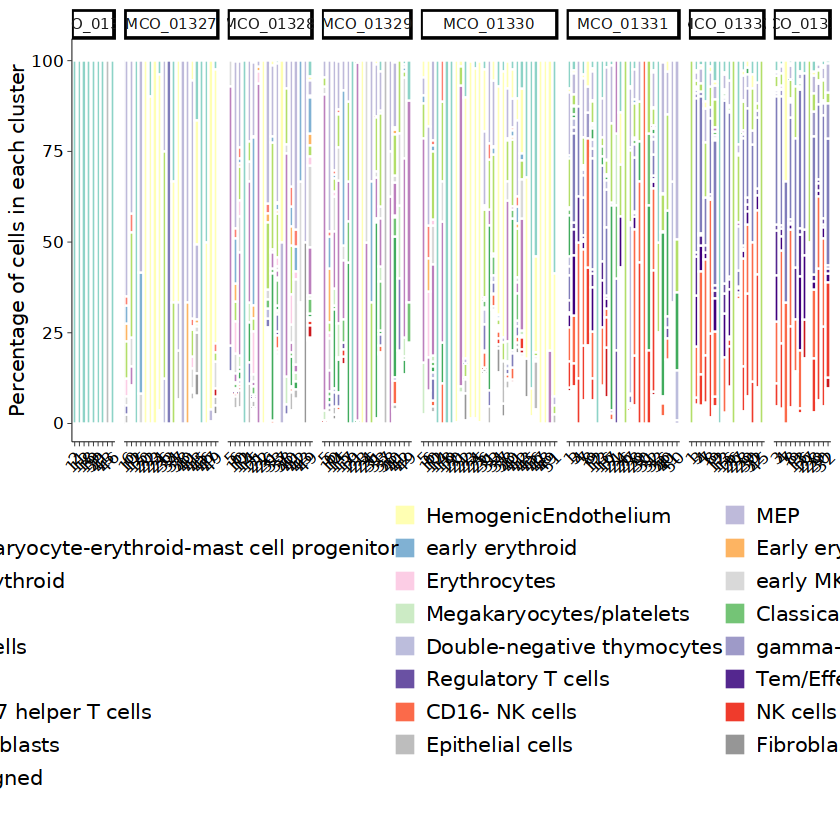

In [186]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-ggplot(data= Freq.table_filtered,
           aes(x=seurat_clusters, y=Perc, fill=Integrated_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=vector_colors,
                      drop=F,
                      name="Integrated Annot")

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident, scales='free_x', space='free_x', switch="y")+   
    scale_x_discrete(name="Seurat clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=10,byrow=TRUE))



stacked_barplot
  




  

In [187]:
setwd(path_graphs)

svgname<-paste("Stacked_barplot_combined_vs_cluster",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =13, height = 13)
}

## Dotplot

png 
  2

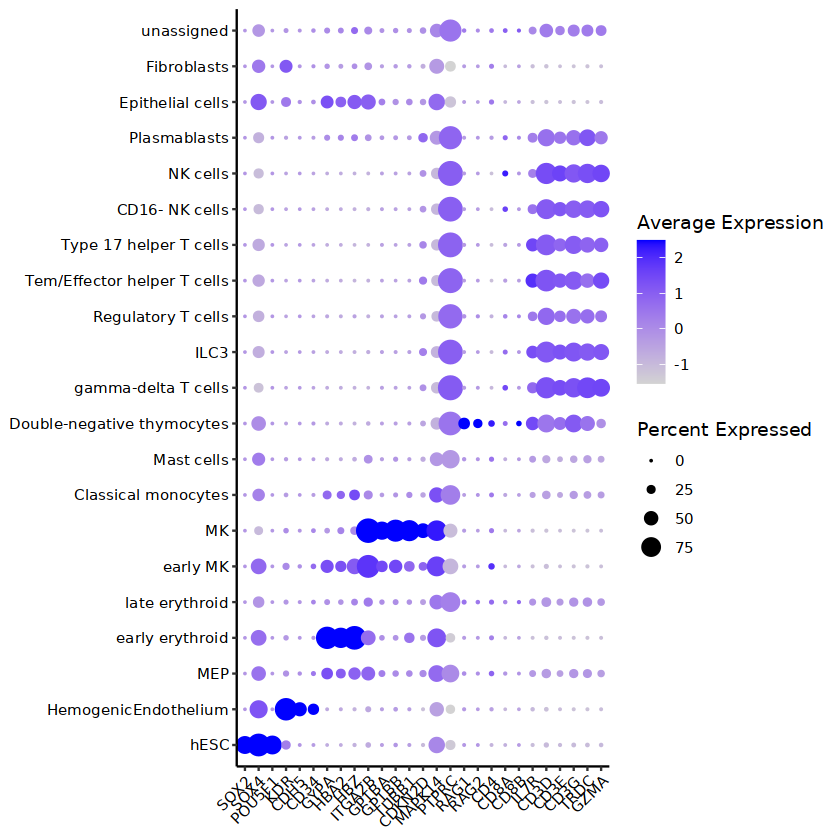

In [310]:
dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="Integrated_annotation")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_Integrated_annotation_TWO.png', width =1000)
dotplot3
dev.off()

## Decisions #8 

In [311]:
adata@meta.data$Integrated_annotation<-as.character(adata@meta.data$Integrated_annotation)

In [312]:
adata@meta.data$Integrated_annotation[which(adata@meta.data$Integrated_annotation%in%c('Megakaryocytes/platelets'))]<-'MK'
adata@meta.data$Integrated_annotation[which(adata@meta.data$Integrated_annotation%in%c('Early erythroid'))]<-'early erythroid'
adata@meta.data$Integrated_annotation[which(adata@meta.data$Integrated_annotation%in%c('Erythrocytes'))]<-'early erythroid'
adata@meta.data$Integrated_annotation[which(adata@meta.data$Integrated_annotation%in%c('Megakaryocyte-erythroid-mast cell progenitor'))]<-'MEP'




In [313]:
adata@meta.data$Integrated_annotation<-factor(adata@meta.data$Integrated_annotation,
                                              c('hESC','HemogenicEndothelium','MEP','early erythroid','late erythroid','early MK','MK',
                                                'Classical monocytes','Mast cells',
                                                'Double-negative thymocytes',
                                                'gamma-delta T cells','ILC3',
                                                'Regulatory T cells','Tem/Effector helper T cells','Type 17 helper T cells',
                                                'CD16- NK cells',
                                                'NK cells',
                                                'Plasmablasts',                                                                                          
                                                'Epithelial cells',
                                                'Fibroblasts',
                                               'unassigned'),
                                              ordered=T)

## Dotplot

png 
  2

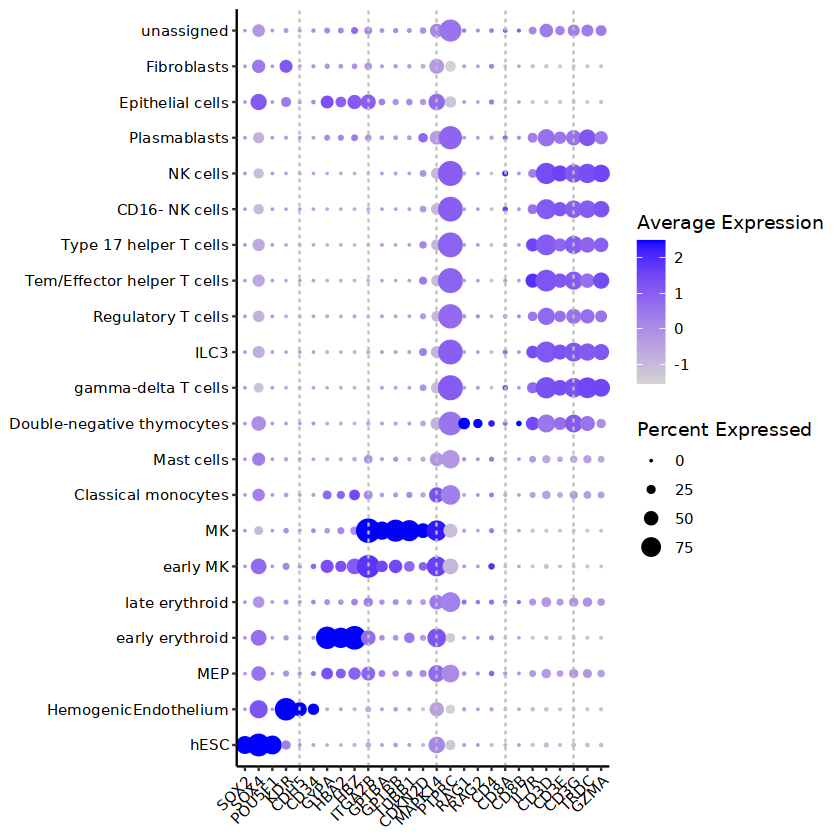

In [316]:
dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="Integrated_annotation")+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_Integrated_annotation_THREE.png', width =1000)
dotplot3
dev.off()

## WNN by Integrated_annotation

In [292]:
levels(adata@meta.data$Integrated_annotation)

[1] "hESC"                        "HemogenicEndothelium"       
 [3] "MEP"                         "early erythroid"            
 [5] "late erythroid"              "early MK"                   
 [7] "MK"                          "Classical monocytes"        
 [9] "Mast cells"                  "Double-negative thymocytes" 
[11] "gamma-delta T cells"         "ILC3"                       
[13] "Regulatory T cells"          "Tem/Effector helper T cells"
[15] "Type 17 helper T cells"      "CD16- NK cells"             
[17] "NK cells"                    "Plasmablasts"               
[19] "Epithelial cells"            "Fibroblasts"                
[21] "unassigned"

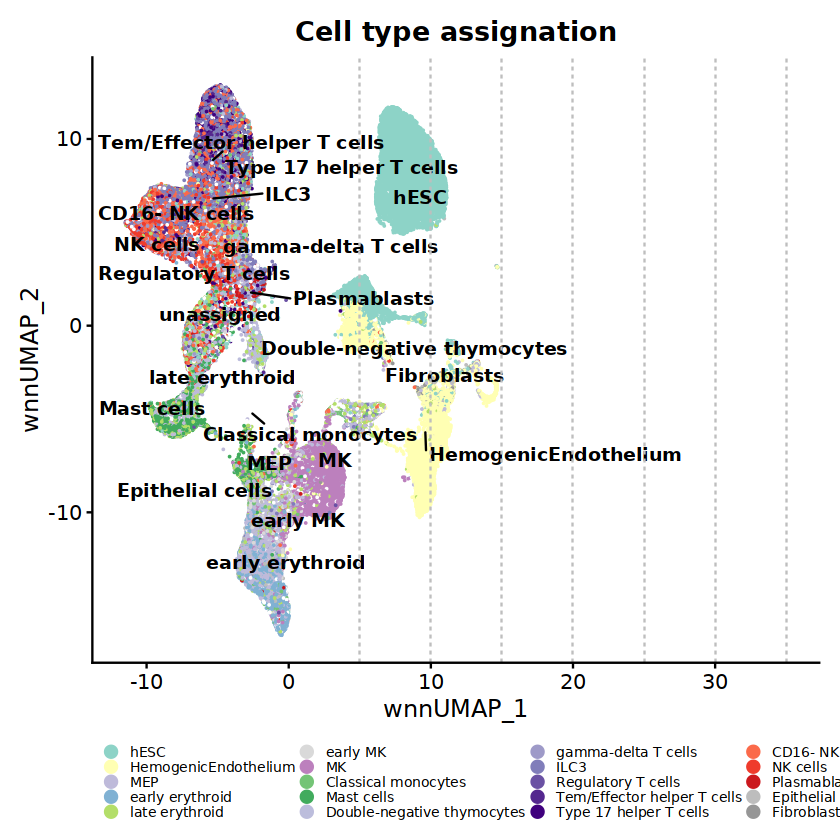

In [315]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "Integrated_annotation", label = FALSE, cols=vector_colors) 

p3<-LabelClusters(p3, id = "Integrated_annotation",  fontface = "bold", color = "black")+
ggtitle("Cell type assignation")+
theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=5,byrow=TRUE))

p3


In [307]:
path_graphs<-"/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/graphs/"

In [308]:
## Graph WNN by CellTypist_label_filtered

setwd(path_graphs)
png(file='WNN_by_Integrated_annotation.png', width=750, height=750)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

# New markers

In [255]:
str(genes)

 chr [1:33160] "MIR1302-2HG" "AL627309.1" "AL627309.3" "AL627309.5" ...


In [256]:
genes[grep("CD14", genes)]

[1] "CD14"

In [287]:
new_markers<-c('PTPRC','CD14','S100A9','S100A12','TPSB2','TPSAB1','RAG1','RAG2','CD4','CD8A','CD8B','IL7R','CD3D','CD3E','CD3G','TRDC','GZMA','GZMB','GZMK','PRF1','GNLY','NCAM1','IFNG','TYROBP','NKG7','RORC','PCDH9','KIT','LST1','CD160','FCGR3A','FCER1A','FOXP3','IL2RA','IL17B','TBX21','CD79A','JCHAIN')

png 
  2

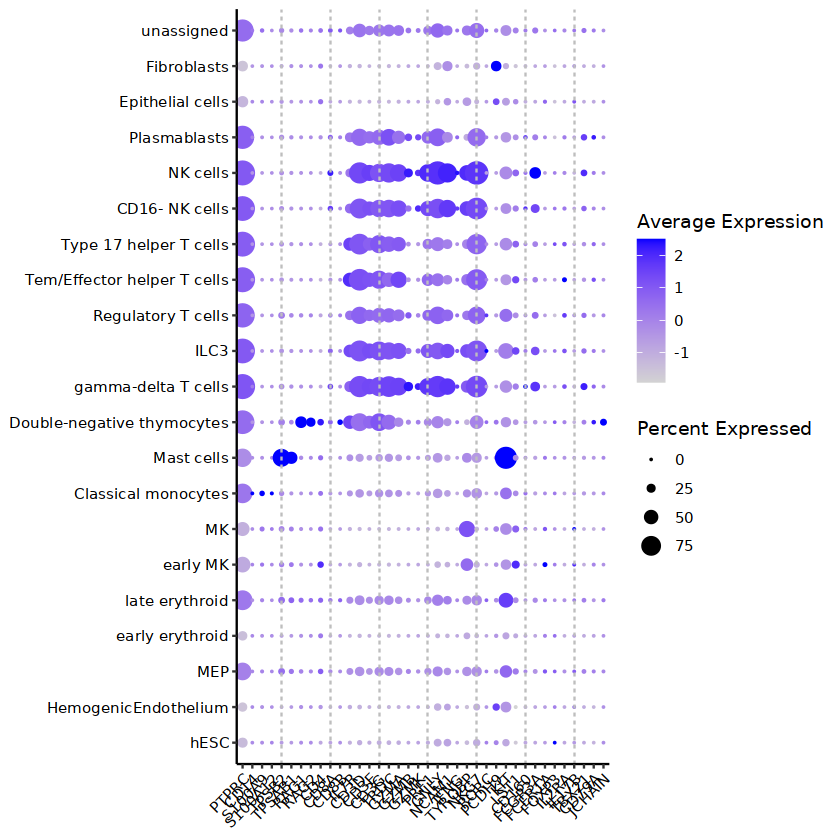

In [288]:
dotplot3<-DotPlot(
  adata,
  features=new_markers,
  assay = "SCT",
    group.by="Integrated_annotation")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")

dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_Integrated_annotation_NEW_MARKERS.png', width =1000)
dotplot3
dev.off()

png 
  2

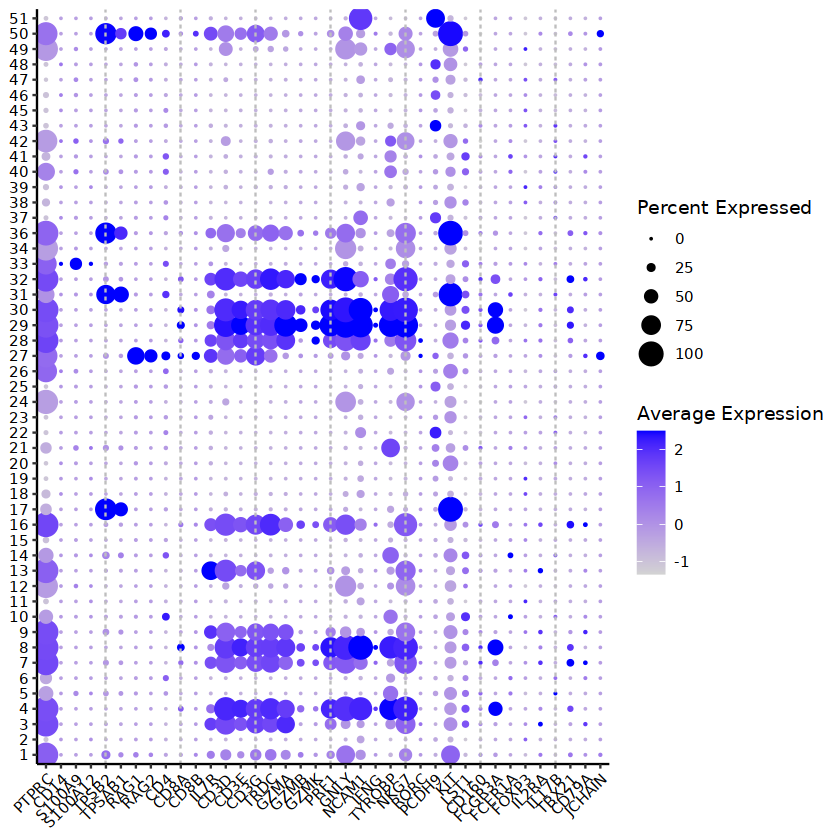

In [289]:
dotplot3<-DotPlot(
  adata,
  features=new_markers,
  assay = "SCT",
    group.by="seurat_clusters")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")

dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_seurat_clusters_NEW_MARKERS.png', width =1000)
dotplot3
dev.off()

In [290]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/")

In [291]:
saveRDS(adata, file="merged_unprocessed_db_filt_clustered_QCed_cell_annotated.rds")